In [508]:
# !pip install  ipywidgets beautifulsoup4 pandas nltk numpy matplotlib seaborn plotly scikit-learn imbalanced-learn wordcloud nbformat
# !jupyter nbextension enable --py widgetsnbextension

In [509]:
# #!pip install ipywidgets pandas nltk numpy matplotlib seaborn matplotlib plotly plotly_express scikit-learn imbalanced-learn
# #!pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0
# #!pip install --upgrade pip setuptools wheel
# #!pip install --only-binary=:all: scikit-learn
# !pip install --upgrade sklearn-compat

# # !jupyter nbextension enable --py widgetsnbextension

In [510]:
# Import data processing and manipulation libraries
import pandas as pd # pandas import to create dataframes to store dataset from file and perform data manipulation (GeeksforGeeks, 2025a; (NumFOCUS Inc, 2025))
import numpy as np# numpy import to create multidimensional arrays and perform mathematical operations (NumPy team, 2025; Jeremiah, 2023)
import string 
import textwrap # string library for string manipulation (Python Software Foundation, 2025)
from bs4 import BeautifulSoup # BeautifulSoup for parsing HTML and XML documents (Richardson, 2025)
import re # Regular expression library for text processing (Python Software Foundation, 2025)
# NLP processing libraries
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet as wn
nltk.download('all')
# Vectorization and feature extraction libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer


# Import data visualization libraries
import plotly.graph_objects as go # Plotly for interactive visualizations (Plotly, 2025)
import plotly.figure_factory as ff # Plotly for interactive visualizations (Plotly, 2025)
import plotly.express as px  # Plotly Express for interactive visualizations  (Plotly, 2025)
import seaborn as sns # seaborn import to for data visualization and statistical graphics (Waskom, 2024)
import matplotlib.pyplot as plt# matplotlib import for data visualization and plotting (GeeksforGeeks, 2025b;Matplotlib, 2025)
from matplotlib.ticker import MaxNLocator #(Matplotlib development team, 2025)
#matplotlib inline to display plots in the notebook
%matplotlib inline
from wordcloud import WordCloud



# Import Scikit-learn packages for machine learning tasks
from collections import Counter
import sklearn #  sklearn import provides machine learning algorithms and tools for data preprocessing (Great Learning, 2025; Scikit-Learn, 2025)
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC# Import Support Vector Machine (SVM) from sklearn (scikit-learn developers, 2025a)
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, make_scorer,classification_report , ConfusionMatrixDisplay, PrecisionRecallDisplay, precision_recall_curve# (scikit-learn developers, 2025c)
from sklearn.model_selection import train_test_split ,KFold, StratifiedKFold, cross_val_score ,cross_validate, cross_val_predict # Import libraries  for model evaluation (scikit-learn developers, 2025d)
from sklearn.preprocessing import StandardScaler, LabelEncoder #((scikit-learn developers, 2025e) 
from sklearn.pipeline import Pipeline  as ImbPipeline #(scikit-learn developers, 2025b)	
import joblib #(Joblib developers, 2021)


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\HRMic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\HRMic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\HRMic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\HRMic\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\HRMic\AppData\Roaming\nltk_data...
[

### **Data Collection**

In [468]:
# Loading data from CSV file with pandas to create a dataframe
df = pd.read_csv('input/rawdata.csv')
# Displaying the first 5 rows of the dataframe to understand the data structure and contents
df.head()

,id,user_id,created_at,authorDisplayName,author,authorAvatar,author_id,review_title,review_rating,review_content,...,industry_name,industry_slug,status_id,nps_rating,source,is_reported,business_reporting,author_created_date,author_total_reviews_count,attachments
0,4228893,0cf37140-f94c-11ec-9b49-19cd672a8c8b,2022-12-16 20:51:27,Werner S,Werner S,NaN,0cf37140-f94c-11ec-9b49-19cd672a8c8b,Not telkpm,1,I pay R519 per month and can't signin on the ...,...,Telecommunications,telecommunications,1,NaN,WEBSITE,False,NaN,2022-07-01,3,[]
1,4228846,364faaf0-5104-11ec-8045-7d7a9af8c558,2022-12-16 18:54:28,Nokuthula K,Nokuthula K,NaN,364faaf0-5104-11ec-8045-7d7a9af8c558,Please help me clear my name,1,I can't even buy a house because telkom failed...,...,Telecommunications,telecommunications,1,NaN,WEBSITE,False,NaN,2021-11-29,3,[]
2,4228766,0c8502a0-5ee0-11ea-9899-6f17cff30ea1,2022-12-16 16:28:46,Services A,Services A,NaN,0c8502a0-5ee0-11ea-9899-6f17cff30ea1,Untrustworthy business,1,I was contacted if I wanted to upgrade a data ...,...,Telecommunications,telecommunications,1,NaN,WEBSITE,False,NaN,2020-03-05,50,[]
3,4228626,35bf64d7-31fa-11e8-83f4-f23c91bb6188,2022-12-16 12:58:01,Nina H,Nina H,NaN,35bf64d7-31fa-11e8-83f4-f23c91bb6188,telkom,1,Have been in a fight with TELKOM since August ...,...,Telecommunications,telecommunications,1,NaN,WEBSITE,False,NaN,2017-05-06,1,[]
4,4228610,2b490ce9-31fa-11e8-83f4-f23c91bb6188,2022-12-16 12:42:24,Arshad P,Arshad P,NaN,2b490ce9-31fa-11e8-83f4-f23c91bb6188,TELKOM Killarney Looting on Upgrade,1,"-10, \nSo I have Telkom contract with Telkom f...",...,Telecommunications,telecommunications,1,NaN,WEBSITE,False,NaN,2016-07-01,5,[]


In [469]:
#Print the Shape of the DataFrame (rows and columns)
# The shape will serve as a reference for the number of records and features in the dataset to validate data is being tranformed as intended 
# and no rows are being lost is lost 
print("Shape of the DataFrame or Dataset(DS): ", df.shape)# 


Shape of the DataFrame or Dataset(DS):  (56260, 27)


>The dataset contains 56260 samples / rows and 27 features (56260, 27).
This gives us a starting point and benchmark to refer back to as we go about transforming the dataset.

In [470]:
# Filter the dataset for Medical Aid industry to focus on medical aid related data
# To ensure analysis is specific to the medical aid industry
df = df[df['industry_name'] == 'Medical Aid'] 
df.shape

(4966, 27)

>Dataset filtered by Medical Aid reviews contains 4966 samples / rows and 27 features (4966, 27).
Dataset has reduced by 51294 rows 


### **Data Cleaning**

In [471]:
# print the datatypes of the DataFrame to understand the data types of each column
# The datatypes will also help to identify if any data type conversions are needed for analysis and machine learning tasks
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4966 entries, 25909 to 30874
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          4966 non-null   int64  
 1   user_id                     4966 non-null   object 
 2   created_at                  4966 non-null   object 
 3   authorDisplayName           4966 non-null   object 
 4   author                      4966 non-null   object 
 5   authorAvatar                20 non-null     object 
 6   author_id                   4966 non-null   object 
 7   review_title                4964 non-null   object 
 8   review_rating               4966 non-null   int64  
 9   review_content              4966 non-null   object 
 10  business_name               4966 non-null   object 
 11  business_slug               4966 non-null   object 
 12  permalink                   4966 non-null   object 
 13  replied                     4966 

> **Initial Dataset contains 27 columns or features, made up of `int`, `object`, and `bool` data types.**  
>
>> **6 columns are of `int` datatype**  
> Suitable as input for machine learning algorithms  
> Columns:  
> `id`, `review_rating`, `replied`, `status_id`, `author_total_reviews_count`, `nps_rating`
>
>> **1 column is of `bool` datatype**  
> Suitable as input for machine learning algorithms  
> Column:  
> `is_reported`
>
>> **20 columns are of `object` (string) datatype**  
> Must be converted to numerical values (e.g., vectors or encodings) to be used for sentiment analysis  
> Columns:  
> `user_id`, `created_at`, `authorDisplayName`, `author`, `authorAvatar`, `author_id`, `review_title`, `review_content`, `business_name`, `business_slug`, `permalink`, `messages`, `business_logo`, `industry_logo`, `industry_name`, `industry_slug`, `source`, `business_reporting`, `author_created_date`, `attachments`


##### *Drop Columns Irrelevant to Analysis*

In [472]:
# filter the dataset to include only the columns of interest for analysis
# 'review_rating' used to uncover
# 'review_content' used for text processing and sentiment analysis
# 'author' for author and 'created_at' for identification of duplicate reviews
# The other columns will be dropped to reduce the dataset size and focus on the relevant data for analysis
columns_to_drop = [col for col in df.columns if col not in ['review_rating', 'review_content',  'author', 'created_at']]
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4966 entries, 25909 to 30874
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      4966 non-null   object
 1   author          4966 non-null   object
 2   review_rating   4966 non-null   int64 
 3   review_content  4966 non-null   object
dtypes: int64(1), object(3)
memory usage: 194.0+ KB


> **The dataset now has 4 columns or features** 
>> *1 of the columns are  of `int` datatype suitable as input for machine learning algorithms*
>
>>*3 of the columns are `objects` datatypes suitable as input for machine learning algorithms*

| **Feature**       | **Data&nbsp;Type** | **Description**                                         |
|-------------------|------------------|---------------------------------------------------------|
| `review_content`  | Object           | Text content of the user review                         |
| `review_rating`   | Integer          | Numerical review rating, typically from 1 to 5          |
| `author`          | Object           | Name of the person who posted the review                |
| `created_at`      | Object           | Text format of the date and time when the review was posted |

##### *Handle Null Values*

In [473]:
print("Num of null values in DataFrame")
# pandas isnull() method to check for null values in the DataFrame
# The null values will help to identify any missing data that may need to be addressed before analysis and machine learning tasks
df.isnull().sum()

Num of null values in DataFrame


created_at        0
author            0
review_rating     0
review_content    0
dtype: int64

##### *Handle Duplicates*

In [474]:
# Review duplicates based on Review Text and Rating that will be used in the analysis
# Initialize dataframes to store duplicate rows based on review content
duplicates_review = df[df.duplicated(subset=['review_content'], keep=False)]
print("Number of duplicate Review Text rows:", len(duplicates_review))
# Initialize dataframes to store duplicate rows based on  rating
duplicates_rating = df[df.duplicated(subset=['review_rating'], keep=False)]
print("Number of duplicate rating rows:", len(duplicates_rating ))

Number of duplicate Review Text rows: 32
Number of duplicate rating rows: 4966


In [475]:
# Display duplicate reviews with their index and rating
# Use created_at  and author to identify the duplicate reviews
print("=== Inspect Duplicate Reviews ===")
for index, review in duplicates_review.iterrows():    
    wrap_text = textwrap.fill(str(review['review_content']), width=80)
    print(f"Index: {index}")
    print(f"Date and Time: {review['created_at']}")
    print(f"Author: {review['author']}")
    print(f"Review Content: {wrap_text}")
    print("-" * 50)

=== Inspect Duplicate Reviews ===
Index: 26044
Date and Time: 2021-09-03 16:45:54
Author: Shanel D
Review Content: I receive 6+ calls from Affinity Health every... single... day. I have so many
blocked numbers for them it's not even funny. How is this legal? You are
harassing people and it's not okay!!! These calls are all unsolicited of
course... does POPIA mean nothing? I certainly never gave my number to you.
Please remove me from your database ASAP.
--------------------------------------------------
Index: 26050
Date and Time: 2021-09-01 16:48:00
Author: Johan L
Review Content: I receive 6+ calls from Affinity Health every... single... day. I have so many
blocked numbers for them it's not even funny. How is this legal? You are
harassing people and it's not okay!!! These calls are all unsolicited of
course... does POPIA mean nothing? I certainly never gave my number to you.
Please remove me from your database ASAP.
--------------------------------------------------
Index: 26913
Date

>Author and created_at columns do not provide any additional information for analysis. Therefore, duplicate reviews will be identified based on review content 

In [476]:
# filter the dataset to include only the columns of interest for analysis
# 'author' for author and 'created_at' for identification of duplicate reviews
# The other columns will be dropped to reduce the dataset size and focus on the relevant data for analysis
columns_to_drop = [col for col in df.columns if col not in ['review_rating', 'review_content']]
df = df.drop(columns=columns_to_drop)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4966 entries, 25909 to 30874
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   review_rating   4966 non-null   int64 
 1   review_content  4966 non-null   object
dtypes: int64(1), object(1)
memory usage: 116.4+ KB


In [477]:
# create a set to track seen reviews and a list to store indices of duplicates
seen  = set()  # (6502, 2019)
# create a list to store indices of duplicates
drop_duplicates = [] # (6502, 2019)

for index, row in duplicates_review.iterrows(): # (6502, 2019)
    # remove leading and trailing whitespace, convert to lowercase for case-insensitive comparison
    review_content = str(row['review_content']).strip().lower()
    # if review is found in seen set, it is a duplicate
    if review_content in seen: # (6502, 2019)
        #add the index of the duplicate review to the list
        drop_duplicates.append(index) # (6502, 2019)
    else:
        seen.add(review_content)

#print("Duplicates to drop:", drop_duplicates)
# Drop the identified duplicate reviews from the original DataFrame
df = df.drop(drop_duplicates, errors='ignore')

In [478]:
#check if duplicates are removed
duplicates_review = df[df.duplicated(subset=['review_content'], keep=False)]
print("Remaining duplicate Review Text rows:", len(duplicates_review))

Remaining duplicate Review Text rows: 0


In [479]:
# Count of unique values found in each column
# this further helps to gauge the data quality and identify any potential issues with the data.
# such as binnary values, categorical values containg more than two unique values, and numerical values with a large range of unique values.
unique_counts = df.nunique()
print("Number of unique values within each column:")
# print the unique counts for each column to understand the data distribution and identify any potential issues with the data
print(unique_counts)

Number of unique values within each column:
review_rating        5
review_content    4945
dtype: int64


In [480]:
#print the shape of the DataFrame after removing to ensure transformation is correct
df.shape

(4945, 2)

In [481]:
# Initialize reviews_list from the 'review_content' column in the DataFrame
reviews_list = df['review_content'].tolist() 
reviews_list = sorted(reviews_list, key=lambda x: len(str(x)))


In [482]:
# Display top 5 shortest reviews
print("Top 5 shortest reviews:")
for review in reviews_list[:5]:
    wrap_text = textwrap.fill(str(review), width=80)
    print(wrap_text)
    print("-" * 50)


Top 5 shortest reviews:
Bad
--------------------------------------------------
Good
--------------------------------------------------
Simon
--------------------------------------------------
Simone
--------------------------------------------------
Happy
--------------------------------------------------


In [483]:
print("\nTop 5 longest reviews:")
for review in reviews_list[-5:]:
    wrap_text = textwrap.fill(str(review), width=80)
    print(wrap_text)
    print("-" * 50)


Top 5 longest reviews:
I REGRET  and CURSE the day i changed  from discovery to BONITAS.   bonitas is
the worst medical aid, i don't know whether to call it a medical  aid or
nonsense.  When  it comes to deducting their money, trust me they  hold the Gold
medal, they are  the 1st to deduct, but their service is  poor , lets say the is
no service.    1.You go to the GP, the doctor  will be paid after weeks, you
will get an email from  them  telling you that "We have received the following
claim/s, which we are busy processing. It is important to note that this e-mail
serves only to confirm that we have received your claim. Payment of your claim
is dependent upon scheme rules and available benefits."  After certain  weeks
they will pay your GP, mind due the GP admin will keep on calling you that they
haven't  received your payment. Sometimes they wont pay, you have to pay from
your own pocket , then whats the point  of having  a medical aid???? Mxm  2. Its
my second year  using  this me

>Review column contains email text that needs to be filtered for focus on reviews 

In [484]:
pattern = r'From:|Subject:|Re:|Cc:|ID Number\s*\*+|\bmembership\s*\*+|\bMembership number\s*\*+' # (Krishnan, 2024)
print("Reviews that match email pattern:")
email_match = df[df['review_content'].str.contains(pattern)] # (Krishnan, 2024)
print("Number of reviews that match email pattern:", len(email_match)) 
for index, review in email_match.iterrows():
    wrap_text = textwrap.fill(str(review['review_content']), width=80)
    print(f"Index: {index}")
    print(f"Review Content: {wrap_text}")
    print("-" * 50)


Reviews that match email pattern:
Number of reviews that match email pattern: 20
Index: 26372
Review Content: An  update on our situation with Affinity :     Great, because your online
services is not of use at all, not even to talk about the telephone services.
My child was supposed to be admitted on Monday …   **********   **********
From: Vanessa  **********   Sent: Friday, May 18, 2018 2:15 PM To: Heili Lane
**********  Cc:  **********  'Morne Lane'  **********  Subject: Re: COMPLAINT -
MJ LANE  ********** 062  Good Day, Thank you for your email, your complaint has
been received and is being evaluated. You will be contacted with feedback soon.
Regards.   Manage    Like  · Reply · 21m.      Heili Lane        Heili Lane  17
May 2018  By e-mail Member : Mr Morne Juan Lane-  **********    Dear Mr Morne
Juan Lane  RE:  ********** 062/ Jaden Vorster Dep02/Ganglion of the middle
finger Claim Date:17 May 2018   We have received your request for benefit
confirmation on the above claim and h

In [485]:
# drop rows that match the pattern to remove email headers and footers
df.drop(df[df['review_content'].str.contains(pattern)].index,inplace=True) # (Krishnan, 2024)
# Reset index
df.reset_index(drop=True, inplace=True)


In [486]:
# Display reviews that match the pattern
print("Remaining Reviews that match email pattern:")
email_match = df[df['review_content'].str.contains(pattern)]
for index, review in email_match.iterrows():
    wrap_text = textwrap.fill(str(review['review_content']), width=80)
    print(f"Index: {index}")
    print(f"Review Content: {wrap_text}")
    print("-" * 50)


Remaining Reviews that match email pattern:


In [487]:
# print the descriptive statistics of the DataFrame to understand the distribution of numerical features
# Helps identify any outliers or anomalies in the data that may be addressed before analysis and machine learning tasks
#  Review Rating is a numerical feature ,
#  However, it is categorical in nature 
df.describe()

,review_rating
count,4925.000000
mean,2.841624
std,1.743531
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,5.000000


>**Review Rating:** 
The mean 2.84 is very close to the median 2, this indicates majority of ratings range from neutral to negative. The std of 1.74 is a high value compared to the features mean, implying that there is high variability within the spread of rating across dataset. 
>
>**This variability is confirmed by the 25th and 75th percentile**
>
>25th percentile which shows 25% reviews are negative.
>
>75th percentile which shows 25% reviews are positive. 
>
>This suggests a bimodal distribution of ratings 


### **Univariate Analysis**

#### *Feature engineering*

In [488]:
# Function to calculate the length of a text
def get_length(text):
     # get the length of the text using len() function
     # The len() function returns the number of characters in the text
     length = len(text) 
     #return the length of the text
     return length

# Function to calculate the word count of a text
def get_word_count(text): 
    # get the word count of the text by splitting the text into words
    #  The split() method splits the text into words based on whitespace
    word_count = len(text.split())
    #return the word count of the text
    return word_count  

# Function to calculate the average sentence length of a text 
def average_sentence_length(text): 
    # split the text into sentences using regular expression
    # The re.split() method splits the text into sentences based on punctuation marks   
    sentences = re.split(r'[.!?]+', text)
    # remove leading and trailing whitespace from each sentence
    sentences = [s.strip() for s in sentences if s.strip()]  
    #if there are no sentences
    if len(sentences) == 0:
        #  return 0 to avoid division by zero
        return 0
    # calculate the average sentence length by dividing the total number of words by the number of sentences
    sum_length = sum(len(s.split()) for s in sentences) / len(sentences)
    #return sum_length 
    return sum_length


In [489]:
#create new columns in the DataFrame to store the length, word count, and average sentence length of the review content
df['review_length'] = df['review_content'].apply(get_length)
df['word_count'] = df['review_content'].apply(get_word_count)
df['avg_sentence_length'] = df['review_content'].apply(average_sentence_length)
#confirm the new columns are added to the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   review_rating        4925 non-null   int64  
 1   review_content       4925 non-null   object 
 2   review_length        4925 non-null   int64  
 3   word_count           4925 non-null   int64  
 4   avg_sentence_length  4925 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 192.5+ KB


#### *Feature Engineering: Labelling*

In [490]:
# Function to assign sentiment based on review rating
# The function takes a rating as input and returns a sentiment label based on the rating value
def assign_sentiment(rating):
    #if rating is 1 or 2, assign 'Negative' sentiment
    if rating == 1 or rating == 2:
         return 'Negative'
    #if rating is 4 or 5, assign 'Positive' sentiment
    elif rating == 4 or rating == 5:
        return 'Positive'
    # else rating is 3, assign 'Neutral' sentiment
    else:

         return 'Neutral'


In [491]:
# Initialize a new column 'review_label' in the DataFrame to store the sentiment label for each review
# The sentiment label is assigned based on the review rating using the assign_sentiment function
df['review_label'] = df['review_rating'].apply(assign_sentiment)
print("Unique values in 'review_label' column:", df['review_label'].unique())
print("\n")
#confirm the new column is added to the DataFrame
df.info()


Unique values in 'review_label' column: ['Negative' 'Neutral' 'Positive']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   review_rating        4925 non-null   int64  
 1   review_content       4925 non-null   object 
 2   review_length        4925 non-null   int64  
 3   word_count           4925 non-null   int64  
 4   avg_sentence_length  4925 non-null   float64
 5   review_label         4925 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 231.0+ KB


##### *Distribution of Review Sentiment and Rating*

Text(0, 0.5, 'Review Sentiment')

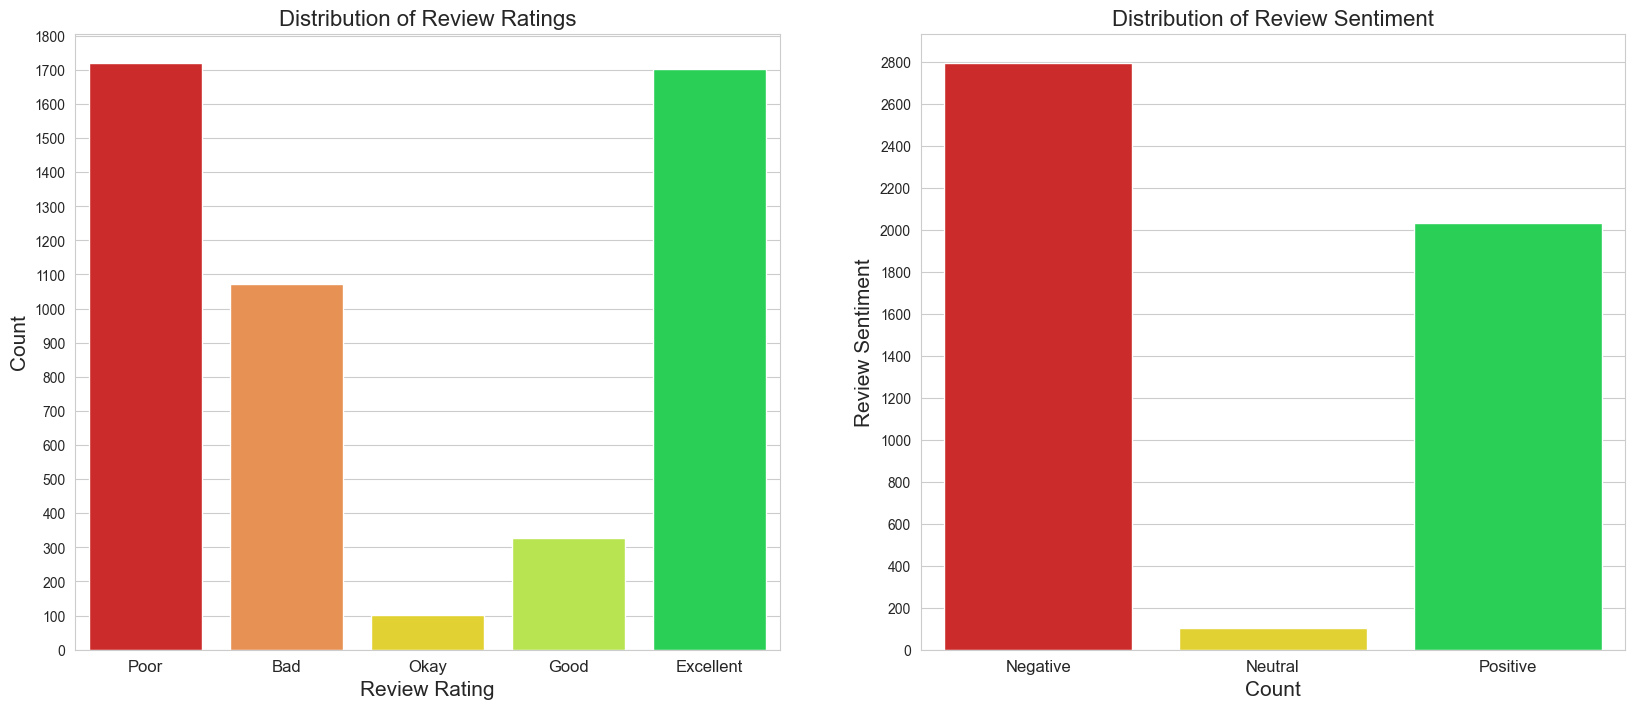

In [492]:
# Set the overall figure size
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  #(Beit, 2021)
#set cancer diagnosis colors
review_colours =  ["#E71010", "#FF8D3C", "#FFE816", "#C2FD38", "#0EEB49"] 
#set cancer diagnosis colors
sent_colours =  ["#E71010", "#FFE816",  "#0EEB49"] 

# Plot 1 => Review Rating
# graph assigned to seaborn countplot() method to create a count plot to visualize the distribution of review_rating in the DataFrame
# data = dfInsure to indicate the data to be used for the count
# x = "Diagnosis" to set  the variable to be used for the x-axis
graph = sns.countplot(data=df, x='review_rating', palette=review_colours, hue='review_rating',  ax=axes[0]) #(Waskom, 2024)
graph.yaxis.set_major_locator(MaxNLocator(nbins=20)) 
graph.legend_.remove()
# set the x-ticks to display the labels for the x-axis
axes[0].set_xticks([0, 1, 2, 3, 4],['Poor', 'Bad', 'Okay', 'Good', 'Excellent'], fontsize=12)
axes[0].set_title('Distribution of Review Ratings', fontsize=16)
axes[0].set_xlabel('Review Rating', fontsize=15)
axes[0].set_ylabel('Count', fontsize=15)

# Plot 2 => Review Label
#graph assigned to seaborn countplot() method to create a count plot to visualize the distribution of review_label in the DataFrame
# data = dfInsure to indicate the data to be used for the count
# x = "Diagnosis" to set  the variable to be used for the x-axis
graph = sns.countplot(data=df, x='review_label', palette=sent_colours, hue='review_label',  ax=axes[1]) #(Waskom, 2024)
graph.yaxis.set_major_locator(MaxNLocator(nbins=15)) 
# set the x-ticks to display the labels for the x-axis
axes[1].set_xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'], fontsize=12)
axes[1].set_title('Distribution of Review Sentiment', fontsize=16)
axes[1].set_xlabel('Count', fontsize=15)
axes[1].set_ylabel('Review Sentiment', fontsize=15)

The count plots illustrates the frequency distribution of review rating and sentiment. 

> **Distribution of Review Ratings (Left)**\
A large proportion of approx. 1700 member review ratings fall under that 'Poor' and 'Excellent' labels.\
While a moderate portion (approx. 1090) of member review rating is 'Bad' (approx. 1090).\
'Good' and 'Okay' rating make up the smallest portion of rating within the sample, approx. 329 (Okay) and approx. 100 (Good) instances respectively  


> **Distribution of Review Sentiment (Right)**\
The largeest proportion of approx. 2800 member reviews fall under the 'Negative' sentiment label\
and a slightly reduced portion (approx. 2000) of reviews fall under that 'Positive' sentiment label.\
'Neutral' review makes up the smallest subset within the sample, with under 200 instances.  


Therefore, the dataset has an uneven bimodel distribution of the target variable (sentiment), this could negatively impact the performance of the classification model. As individuals who don't have cancer may be favoured in training (Roepke, 2024).
The imbalance will be considered through model selection and method, such as as class weighting, cross validation and smote (Roepke, 2024).

Text(0, 0.5, 'Count')

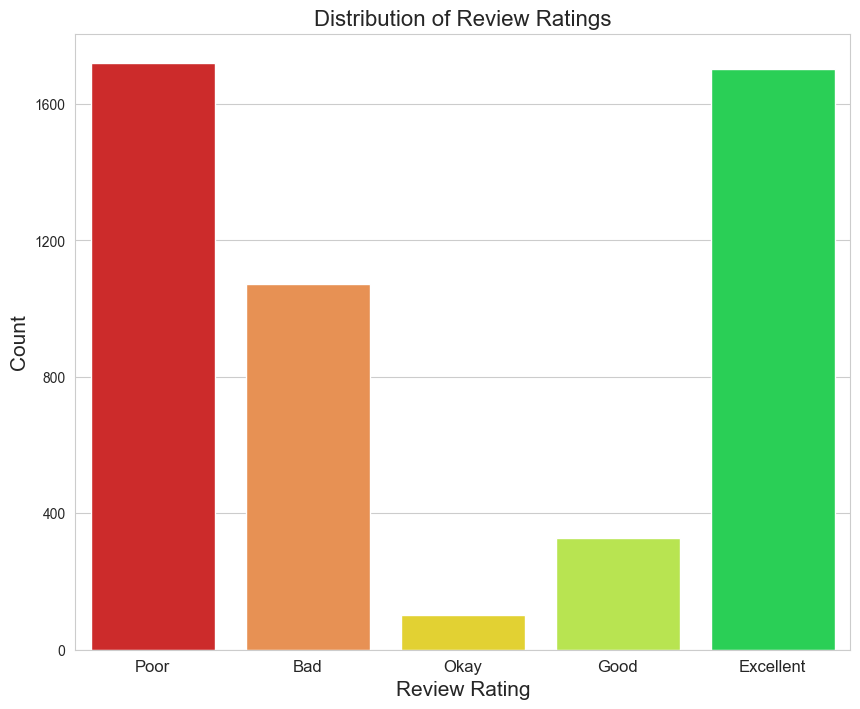

In [493]:
#set cancer diagnosis colors
review_colours =  ["#E71010", "#FF8D3C", "#FFE816", "#C2FD38", "#0EEB49"] 
# set the figure size for the plot
plt.figure(figsize=(10,8))
# graph assigned to seaborn countplot() method to create a count plot to visualize the distribution of  gender in the DataFrame
# data = dfInsure to indicate the data to be used for the count
# x = "Diagnosis" to set  the variable to be used for the x-axis
graph = sns.countplot(data=df, x='review_rating', palette=review_colours, hue='review_rating') #(Waskom, 2024)
graph.yaxis.set_major_locator(MaxNLocator(nbins=5)) 
graph.legend_.remove()
# set the x-ticks to display the labels for the x-axis
plt.xticks([0, 1, 2, 3, 4],['Poor', 'Bad', 'Okay', 'Good', 'Excellent'], fontsize=12)
plt.title('Distribution of Review Ratings', fontsize=16)
plt.xlabel('Review Rating', fontsize=15)
plt.ylabel('Count', fontsize=15)

Text(0.5, 0, 'Review Sentiment')

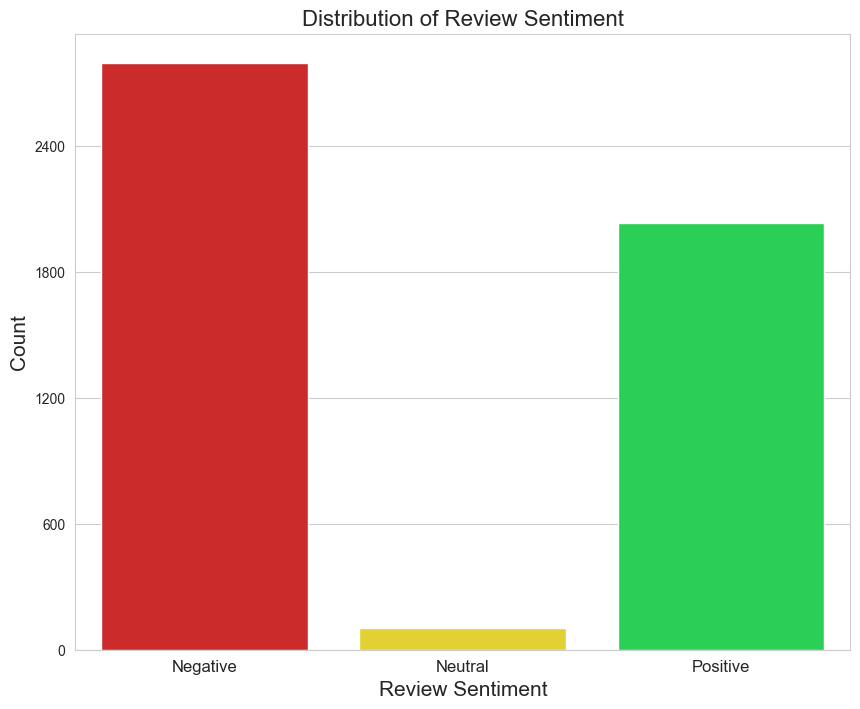

In [494]:
#set cancer diagnosis colors
sent_colours =  ["#E71010", "#FFE816",  "#0EEB49"] 
# set the figure size for the plot
plt.figure(figsize=(10,8))
# graph assigned to seaborn countplot() method to create a count plot to visualize the distribution of  gender in the DataFrame
# data = dfInsure to indicate the data to be used for the count
# x = "Diagnosis" to set  the variable to be used for the x-axis
graph = sns.countplot(data=df, x='review_label', palette=sent_colours, hue='review_label') #(Waskom, 2024)
graph.yaxis.set_major_locator(MaxNLocator(nbins=5)) 
# set the x-ticks to display the labels for the x-axis
plt.xticks([0, 1, 2], ['Negative', 'Neutral', 'Positive'], fontsize=12)
plt.title('Distribution of Review Sentiment', fontsize=16)
plt.ylabel('Count', fontsize=15)
plt.xlabel('Review Sentiment', fontsize=15)

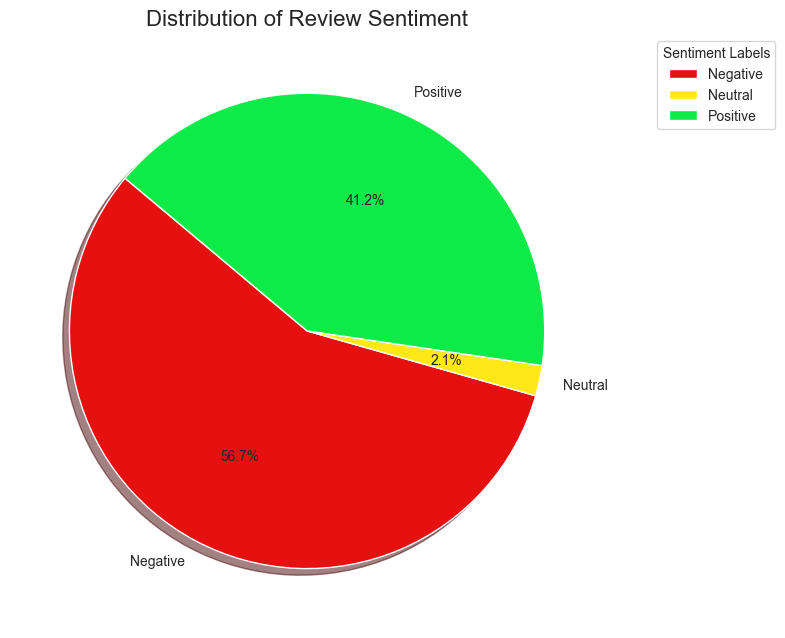

In [495]:
plt.Figure(figsize=(15,8))
# Create a pie chart to visualize the distribution of the 'Diagnosis' column in the DataFrame
sent_counts = df['review_label'].value_counts().sort_index() #(W3Schools, 2025)
sent_labels = ['Negative', 'Neutral', 'Positive']
# Initialize the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sent_counts, 
        labels=sent_labels, 
        colors=sent_colours, 
        autopct='%1.1f%%', 
        startangle=140, 
        shadow=True)
plt.title('Distribution of Review Sentiment', fontsize=16)
plt.legend(title='Sentiment Labels', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()


>The Pie chart shows the distribution of sentiment labels, further confirming the uneven distribution of sentiment labels in the dataset
Within the sample of 4924 reviews , 52.7% of reviews are negative , 34.6% has positive and 8.7% are neutral. 


##### *Distribution of Reviews Length, Word Count and Sentence Length*

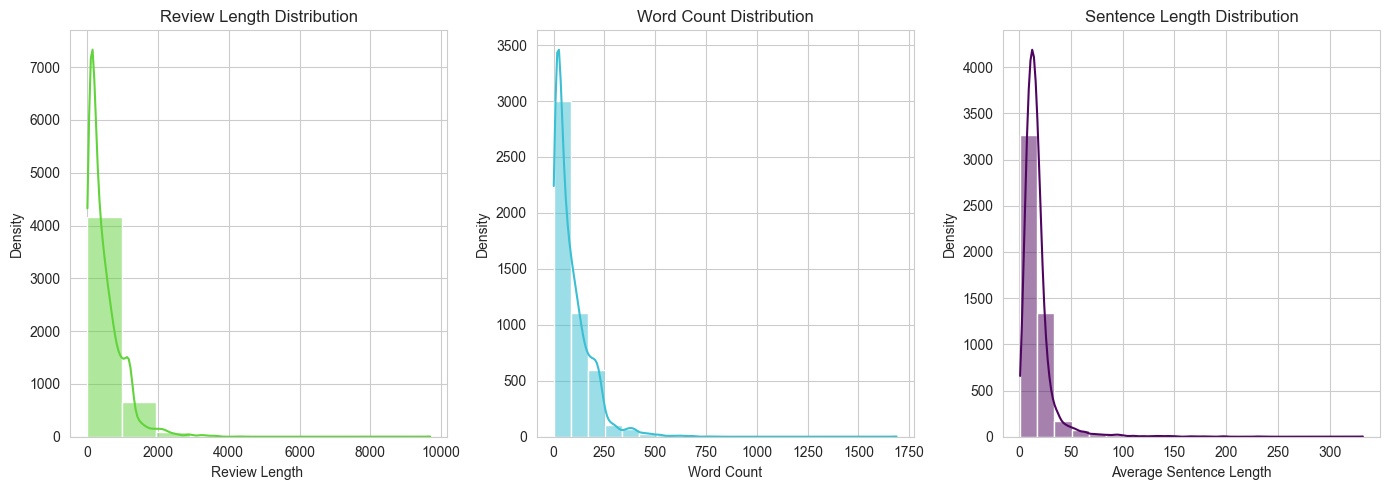

In [496]:
# Set the overall figure size
fig, axes = plt.subplots(1, 3, figsize=(14, 5))  #(Beit, 2021)

# Plot 1 => Review Length
#Initialize seaborn histplot to visualize the distribution of 'review_length' in the DataFrame
# x , set to 'review_length' 
# color, set to '#61D33B' for color scheme
# kde, set to True to add a kernel density estimate
# ax, set to the first subplot in the 3x1 grid
sns.histplot(df['review_length'],  color="#61D33B", bins=10, kde=True, ax=axes[0])
axes[0].set_title('Review Length Distribution')
axes[0].set_xlabel('Review Length ')
axes[0].set_ylabel('Density')
# Plot 2 => Word Count 
# Initialize seaborn histplot to visualize the distribution of 'word_count' in the DataFrame
# x , set to 'word_count'
# color, set to '#3BBFD3' for color scheme
# kde, set to True to add a kernel density estimate
# ax, set to the second subplot in the 3x1 grid
sns.histplot(df['word_count'], color="#3BBFD3", bins=20, kde=True, ax=axes[1])
axes[1].set_title('Word Count Distribution')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Density')
# Plot 3 => Average Sentence Length
# Initialize seaborn histplot to visualize the distribution of 'avg_sentence_length' 
# x, set to 'avg_sentence_length' 
# color, set to '#4E055F' for color scheme
# kde, set to True to add a kernel density estimate
# ax, set to the fourth subplot in the 3x1 grid
sns.histplot(df['avg_sentence_length'], color="#4E055F", bins=20, kde=True, ax=axes[2])
axes[2].set_title('Sentence Length Distribution')
axes[2].set_xlabel('Average Sentence Length')
axes[2].set_ylabel('Density')


# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Text Features for Reviews show a similar distribution across Review Length , Word Count and Average Sentence Length. The plots suggest that majority of reviews are of short to moderate length, while a small subset of reviews and much longer.

>**Review Characters Length (Plot 1, Green):**\
Data points for Review Length fall in between 0 to just under 10000 on the x-axis ( Review Length). Although, graph shows a right skewed distribution with majority of 'reviews_lenghts' concentrated at approximately 0 to 2000 chars on the x-axis ( Review Length). Furthermore, the heavy tails show an uneven spread of data and suggest the likelihood of outliers.
 
>**Word Count (Plot 2, Blue):** \
Similarly, Word Count graph shows a right skewed distribution with majority of 'word_count' for a review concentrated at approximately 0 to 500 words on the x-axis (Word Count).Though, data points spread across a range of 0 to just under 1750 words on the x-axis (Word Count). Furthermore, the heavy tails show an uneven spread of data and suggest the likelihood of outliers.

>**Average Sentence Length (Plot 3, Purple):**\
Data points for Average Sentence Length fall in between 0 to just under 300 on the x-axis (Average Sentence Length). Although, graph shows a right skewed distribution with majority of datapoints concentrated at approximately 0 to 300 sentences per review on the x-axis (Average Sentence Length). Furthermore, the heavy tails show an uneven spread of data and suggest the likelihood of outliers.


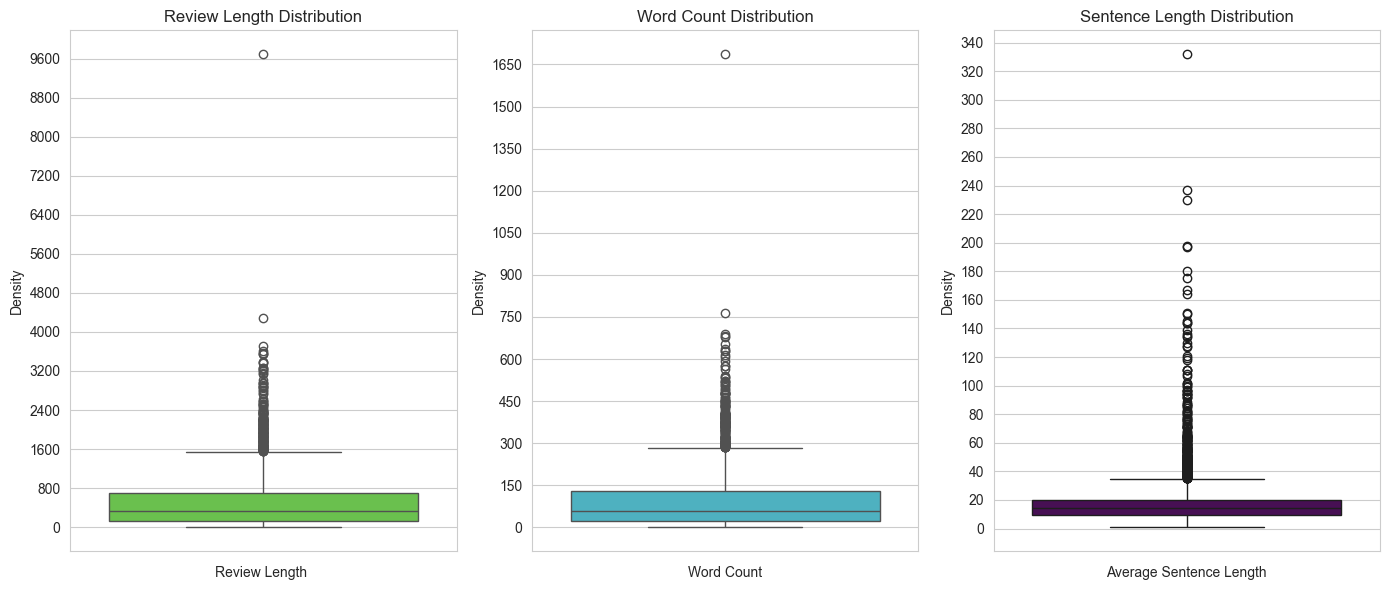

In [497]:
# Set the overall figure size
fig, axes = plt.subplots(1,3, figsize=(14, 6))  #(Beit, 2021)

# Plot 1 => Review Length
#Initialize seaborn boxplot to visualize the distribution of 'review_length' in the DataFrame
# x , set to 'review_length' 
# color, set to '#61D33B' for color scheme
# ax, set to the first subplot in the 3x1 grid
sns.boxplot(y='review_length', data=df,  color="#61D33B",  ax=axes[0])
axes[0].set_title('Review Length Distribution')
axes[0].set_xlabel('Review Length ')
axes[0].set_ylabel('Density')
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=15))
# Plot 2 => Word Count 
# Initialize seaborn boxplot to visualize the distribution of 'word_count' in the DataFrame
# x , set to 'word_count'
# color, set to '#3BBFD3' for color scheme
# kde, set to True to add a kernel density estimate
# ax, set to the second subplot in the 1x3 grid
sns.boxplot(y='word_count', data=df,  color="#3BBFD3",  ax=axes[1])
axes[1].set_title('Word Count Distribution')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Density')
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=15))
# Plot 3 => Average Sentence Length
# Initialize seaborn boxplot to visualize the distribution of 'avg_sentence_length' 
# x, set to 'avg_sentence_length' 
# color, set to '#4E055F' for color scheme
# kde, set to True to add a kernel density estimate
# ax, set to the fourth subplot in the 1x3 grid
sns.boxplot(y='avg_sentence_length', data=df,  color="#4E055F",  ax=axes[2])
axes[2].set_title('Sentence Length Distribution')
axes[2].set_xlabel('Average Sentence Length')
axes[2].set_ylabel('Density')
axes[2].yaxis.set_major_locator(MaxNLocator(nbins=20))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The boxplots for Review Length, Word Count and Average Sentence Length features further illustrated the skewed distribution within reviews text characteristics.
>50 percent of reviews are of a short length as seen by the boxes within plots
- *Review Characters Length (Plot 1, Green)*: 50% of reviews have number characters below 800.
- *Word Count (Plot 2, Blue)*: 50% of reviews word count is below 150 words.
*Average Sentence Length (Plot 3, Purple)*: 50% of reviews average number of sentences is below 20.

>25 percent of reviews are of a moderate to long length as seen by the upper whisker of each plot 
- *Review Characters Length (Plot 1, Green)*: 25% of reviews have number characters between approx. 800 and 1600.
- *Word Count (Plot 2, Blue)*: 25% of reviews word count is between approx. 150 and 300.
- *Average Sentence Length (Plot 3, Purple)*: 25% of reviews average number of sentences falls between approx. 20 to 38 .
>A small portion of reviews are of a very long length as seen by outliers in each plot. Outliers are above maximum line, and boxes are compressed toward the bottom, this confirmation right skewed distribution. 


### **Bi-variate and  Multivariate Analysis**

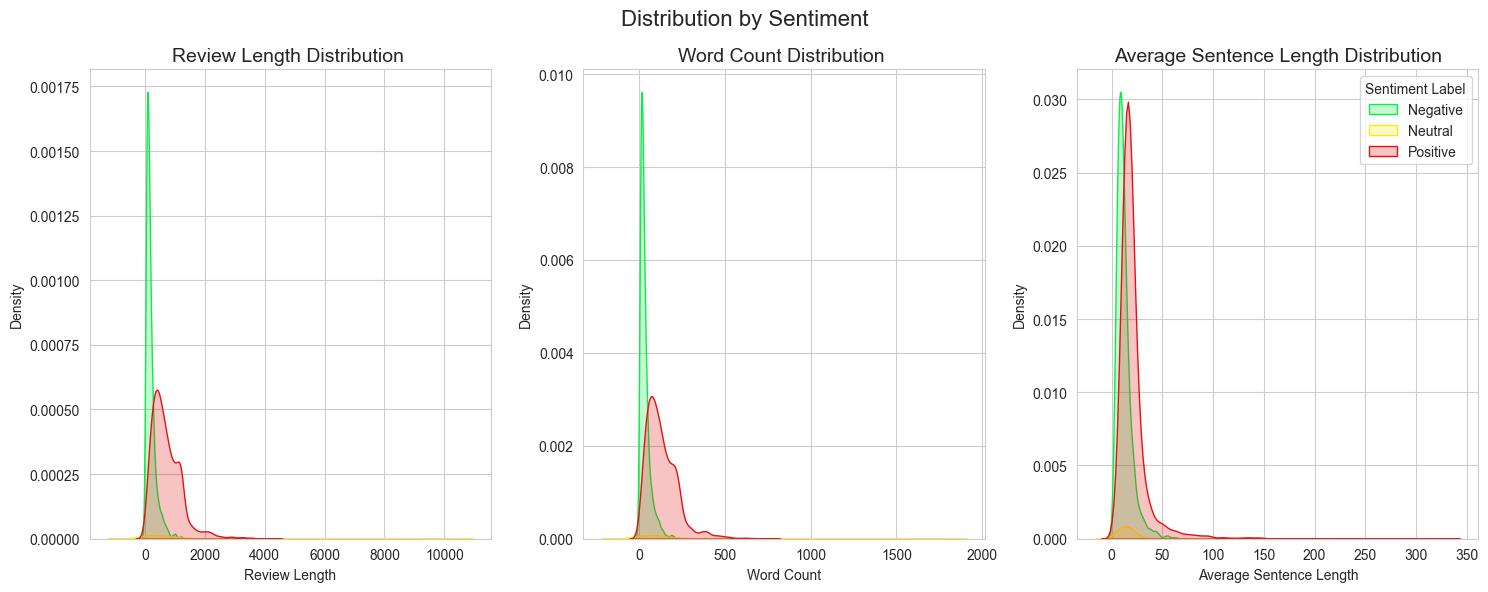

In [498]:
fig, axes = plt.subplots(1, 3, figsize=(15, 6)) #(Beit, 2021)
fig.suptitle('Distribution by Sentiment', fontsize=16)
# Plot 1 => Review Length
# assign graph to seaborn kdeplot() method to create a kernel density estimate plot to visualize the distribution of review lengths by sentiment label
# x, set to 'review_length'
# hue, set to 'review_label' to color the distribution by sentiment label
# fill, set to True to fill the area under the curve
sns.kdeplot(df, x='review_length', hue='review_label', fill=True, palette=sent_colours, ax=axes[0])# (Waskom, 2024d)
# Set the x-axis and y-axis labels
axes[0].set(xlabel='Review Length', ylabel='Density')
# Set the title of the plot
axes[0].set_title('Review Length Distribution ', fontsize=14)
# Remove the legend from the graph
axes[0].legend_.remove()

# Plot 2=> Word Count
# assign graph to seaborn kdeplot() method to create a kernel density estimate plot to visualize the distribution of word count by sentiment label
sns.kdeplot(df, x='word_count', hue='review_label', fill=True, palette=sent_colours, ax=axes[1])# (Waskom, 2024d)
# Set the x-axis and y-axis labels
axes[1].set(xlabel='Word Count', ylabel='Density')
# Set the title of the plot
axes[1].set_title('Word Count Distribution ', fontsize=14)
# Remove the legend from the graph
axes[1].legend_.remove()
# Set the legend title and labels
# Plot 3 => Average Sentence Length
# assign graph to seaborn kdeplot() method to create a kernel density estimate plot to visualize
# the distribution of average sentence length by sentiment label
sns.kdeplot(df, x='avg_sentence_length', hue='review_label', fill=True, palette=sent_colours, ax=axes[2])# (Waskom, 2024d)
# Set the x-axis and y-axis labels
axes[2].set(xlabel='Average Sentence Length', ylabel='Density')
# Set the title of the plot
axes[2].set_title('Average Sentence Length Distribution', fontsize=14)
# Remove the legend from the graph
axes[2].legend_.remove()

# Adjust layout to prevent overlap

plt.legend(title='Sentiment Label', labels=sent_labels, loc='upper right')
plt.tight_layout()
plt.show()


Plots show a similar distribution across Review Length, Word Count and Average Sentence Length features by Sentiment. The plots show that majority of reviews are negative and positive, while a small subset of reviews are neutral.

>**Review Characters Length (Plot 1, Left):**\
The distribution for both negative and positive sentiment right skewed. Positive reviews tend to be shorter, as character lengths are concentrated at a narrower range of approximately 0 to 1000 characters on the x-axis (Review Length). While negative reviews’ character lengths is concentrated at approximately 0 to 3500  and is widely spread across low and high length ranges. Additionally, the positive sentiment KDE ranges across high values on the y-axis, suggesting a larger number of shorter reviews. In contrast, negative sentiment shows less density at character lengths range. Showing a significant difference in the number of shorter reviews for positive and negative sentiment. Neutral sentiment, as the minority class, has a low frequency and is too concentrated in a narrow range approximately 0 to 1000 c characters on the x-axis (Review Length).

>**Word Count (Plot 2, Middle):**\
The word count plot is near identical to the Review Length Plot. The distribution of negative and positive sentiment is both right skewed. Positive review's word count concentrates at approximately 0 to 250 words on the x-axis (Word Count). While negative reviews' word count concentrates at approximately 0 to 500 and is widely spread across low and high word count ranges. The positive sentiment KDE peaks spike at low word count ranges while negative sentiment shows less density at low word count ranges. Indicating shorter reviews are more likely to be positive or neutral. Neutral sentiment as the minority class has a low frequency, is tightly concentrated at lower word count ranges on the x-axis.

>**Average Sentence Length (Plot 3, Right):**\
The distribution of negative and positive sentiment is both right skewed, with positive, negative and neutral review's number of sentences concentrated at approximately 0 to 50 x-axis (Average Sentence Length). Additionally, the positive and negative KDE curve ranges across high values on the y-axis. While neutral sentiment as the minority class has a low frequency, is also concentrated at number of sentences concentrated at approximately 0 to 50 x-axis (Average Sentence Length).


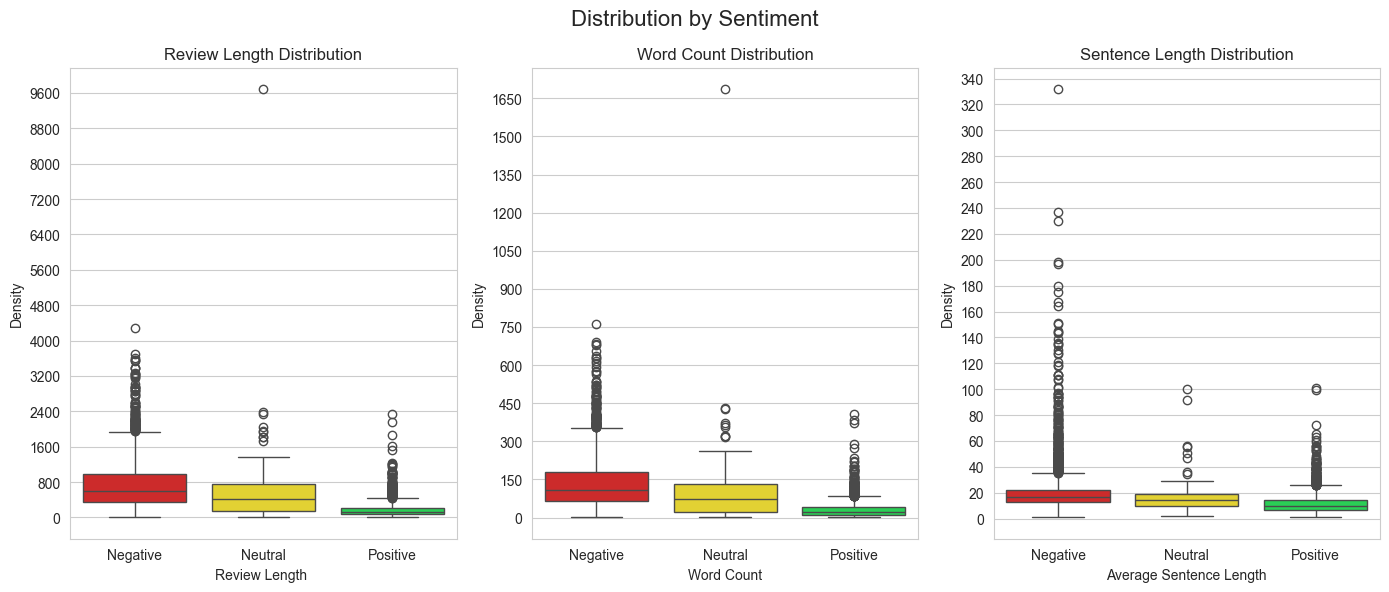

In [499]:
# Set the overall figure size
fig, axes = plt.subplots(1,3, figsize=(14, 6))  #(Beit, 2021)
# set title for the figure
fig.suptitle('Distribution by Sentiment', fontsize=16)
# Plot 1 => Review Length
# Initialize seaborn boxplot to visualize the distribution of 'review_length' in the DataFrame
# x, set to 'review_length' 
# palette, set to sent_colours for color scheme
# hue, set to 'review_label' to color the boxplot by sentiment label
# ax, set to the first subplot in the 3x1 grid
sns.boxplot(y='review_length', data=df,   palette=sent_colours,  ax=axes[0],x='review_label',hue='review_label')
axes[0].set_title('Review Length Distribution')
axes[0].set_xlabel('Review Length ')
axes[0].set_ylabel('Density')
axes[0].yaxis.set_major_locator(MaxNLocator(nbins=15))
# Plot 2 => Word Count 
# Initialize seaborn boxplot to visualize the distribution of 'word_count' in the DataFrame
# x , set to 'word_count'
# palette, set to sent_colours for color scheme
# hue, set to 'review_label' to color the boxplot by sentiment label
# ax, set to the second subplot in the 1x3 grid
sns.boxplot(y='word_count', data=df,   palette=sent_colours,  ax=axes[1],x='review_label',hue='review_label')
axes[1].set_title('Word Count Distribution')
axes[1].set_xlabel('Word Count')
axes[1].set_ylabel('Density')
axes[1].yaxis.set_major_locator(MaxNLocator(nbins=15))
# Plot 3 => Average Sentence Length
# Initialize seaborn boxplot to visualize the distribution of 'avg_sentence_length' 
# x, set to 'avg_sentence_length' 
# palette, set to sent_colours for color scheme
# hue, set to 'review_label' to color the boxplot by sentiment label
# ax, set to the fourth subplot in the 1x3 grid
sns.boxplot(y='avg_sentence_length', data=df,  palette=sent_colours,  ax=axes[2],x='review_label',hue='review_label')
axes[2].set_title('Sentence Length Distribution')
axes[2].set_xlabel('Average Sentence Length')
axes[2].set_ylabel('Density')
axes[2].yaxis.set_major_locator(MaxNLocator(nbins=20))

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

The boxplots for Review Length, Word Count and Average Sentence Length features further illustrated the skewed distribution by Sentiment Labels.

>Short Reviews (50% Range): For negative, positive and neutral reviews 50 percent of reviews are of a short length as seen by the box within plots. However, negative sentiment tends to have longer reviews on averages, as boxes across all feature plots (review length, word count and average sentence length) show a wider range than those for neutral and positive sentiment. 

>Moderate to Long Reviews (Upper 25%): For negative, positive and neutral reviews 25 percent of reviews are of a moderate to long length as seen by the upper whisker of each plot. However, negative sentiment tends to have longer reviews, as whiskers across all feature plots (review length, word count and average sentence length) extend further than neutral and positive sentiment. 

>Very Long Reviews (Outliers): For negative, positive and neutral reviews, a small portion of reviews are of a very long length as seen by outliers in each plot. Outliers are above maximum line, and boxes are compressed toward the bottom, this confirmation right skewed distribution. Across all feature plots (review length, word count and average sentence length ) , negative sentiment has the most outliers suggesting that dissatisfied members  tend to write more extensive reviews. 


### **NPL Preprocessing**

##### *Handle HTML Tags*

In [500]:
# Function to clean HTML tags from text
def clean_tags(text): # (GeeksforGeeks, 2024)
    # Use BeautifulSoup to parse the text and remove HTML tags
    soup = BeautifulSoup(text, 'html.parser') # (GeeksforGeeks, 2024)
    text = soup.get_text() # (GeeksforGeeks, 2024)
    # Return the cleaned text without HTML tags
    return text

df['review_content'] = df['review_content'].apply(clean_tags)
for index, review in df['review_content'].items():
    if index ==4896 or index == 4886 or index == 4879:
        print(f"Index: {index}")
        wrap_text = textwrap.fill(str(review), width=80)
        print(f"Review Content: {wrap_text}")
        print("-" * 50)

Index: 4879
Review Content: I was with Liberty for many many years and found the service and scheme was not
good .  I moved to Discovery and the feed back help was non existent after I
signed.    From the first minute to the last , Bonitas service has been 100%
and I have not had a signal issue what so ever.   Thank you for the breath of
fresh air .   I feel I have made the right decision and will try get my entire
family to move
--------------------------------------------------
Index: 4886
Review Content: Solakhe was very pleasant and assisted me with the correction of income on one
of our pensioners, His assistance in this matter has been highly professional
and it was a pleasure to know that he came back with feedback in the relevant
turn around time.  thank you Very much Yolande Snyman FFG Risk solutions
--------------------------------------------------
Index: 4896
Review Content: Greetings All.  I can confirm that Bonitas have been in touch with me with
regards to my complaint. 

In [501]:
def remove_date_time(text):
    # set regEx for date and time patterns
    date_pattern = r'\b(?:\d{1,2}[/-]\d{1,2}[/-]\d{2,4}|\d{1,2}[a-zA-Z]{3,9}\s\d{2,4})\b' #(Tomar, 2023)
    time_pattern = r'\b(?:\d{1,2}:\d{2}(?::\d{2})?\s*[AP]M|[AP]M\s*\d{1,2}:\d{2}(?::\d{2})?)\b'
    # replace date and time patterns with empty string
    text = re.sub(date_pattern, '', text)
    text = re.sub(time_pattern, '', text) 
    # remove leading and trailing whitespace
    text = text.strip() 
    return text
# Apply the clean_text_keep_years function to the 'review_content' column
df['review_content'] = df['review_content'].apply(remove_date_time)

##### *Change to Lowercase*

In [502]:
def lower_case_text(text): 
    #change the text to lowercase
    # lower() method is used to convert all characters in the text to lowercase
    text = text.lower()  # (Deepanshi, 2025)
    # check if the text is empty or None
    #return lowercase text 
    return text

# Convert the 'Review Text' column to lowercase to ensure uniformity in text data
# df['Review Text'] = df['Review Text'].str.lower() 
df['review_content'] = df['review_content'].apply(lower_case_text)
df['review_content'].head()

0    i was extremely dissapointed! i had to go get ...
1    the service of this medical aid is getting so ...
2    worse medical insurance ever!!! they cover not...
3    useless!!! what a waste of money. it's better ...
4    stay away!! you will spend more time pre-autho...
Name: review_content, dtype: object

##### *Punctuation Removal*

In [503]:
def remove_punctuation(text): # (Deepanshi, 2025)
    # for each character in the text
    for char in text:
        # if the character is a punctuation mark, replace it with a space
        if char in string.punctuation: # (Deepanshi, 2025)
            text = text.replace(char, ' ')      
    # split text into words and joined back together to remove extra spaces
    text = ' '.join(text.split())  # (Deepanshi, 2025)
    # return the cleaned text
    return text

# Remove punctuation from the 'Review Text' column using the remove_punctuation function
df['review_content'] = df['review_content'].apply(remove_punctuation)
df['review_content'].head()

0    i was extremely dissapointed i had to go get m...
1    the service of this medical aid is getting so ...
2    worse medical insurance ever they cover nothin...
3    useless what a waste of money it s better not ...
4    stay away you will spend more time pre authori...
Name: review_content, dtype: object

##### *Tokenisation*

In [504]:
# Function to tokenize text in the 'review_content' column
def tokenize_text(df): # (Lane, 2021)
    # Initialize an array of review text
    #tolist() method is used to convert the 'review_content' column to a list of strings
    tokArray = df['review_content'].tolist()
    # Initialize an empty list to store tokenized text 
    tokened = [] # (Lane, 2021)
    # Use nltk.word_tokenize to tokenize each review text
    # word_tokenize() method is used to split the text into words  
    for token in tokArray: # (Lane, 2021)
         # Use nltk.word_tokenize to tokenize each review text
         # word_tokenize() method is used to split the text into words
            token = word_tokenize(token) # (Lane, 2021)
            # append the tokenized text to the list
            tokened.append(token) # (Lane, 2021)
    #tokArray = [word_tokenize(text) for text in tokArray]
    # Return the array of tokenized review texts
    return tokened # (Lane, 2021)
tokArray = tokenize_text(df)
print("First 5 tokenized review texts:")
for i in range(5):
    print(tokArray[i])

First 5 tokenized review texts:
['i', 'was', 'extremely', 'dissapointed', 'i', 'had', 'to', 'go', 'get', 'medicine', 'otc', 'only', 'to', 'find', 'that', 'my', 'membership', 'didnt', 'match', 'i', 've', 'been', 'paying', 'all', 'this', 'while', 'and', 'on', 'top', 'of', 'that', 'the', 'customer', 'service', 'was', 'unavailable', 'guys', 'what', 'if', 'those', 'meds', 'were', 'a', 'matter', 'of', 'life', 'and', 'death', 'you', 'guys', 'need', 'to', 'extend', 'the', 'working', 'hours', 'to', 'weekends', 'now', 'i', 'm', 'back', 'at', 'work', 'still', 'sick', 'yet', 'i', 'have', 'medical', 'over', 'that', 's', 'insane']
['the', 'service', 'of', 'this', 'medical', 'aid', 'is', 'getting', 'so', 'poor', 'you', 'can', 't', 'go', 'to', 'the', 'doctor', 'without', 'them', 'giving', 'you', 'authorisation', 'hen', 'you', 'try', 'calling', 'them', 'using', 'their', 'platforms', 'response', 'time', 'are', 'forever', 'while', 'you', 'trying', 'to', 'get', 'your', 'child', 'checked', 'out', 'that', '

##### *Handle Stopwords*

In [505]:
# Function to remove stopwords 
def remove_stopwords(tokArray):# (Dutta, 2024)
    # set of English stopwords from NLTK
    # stopwords.words('english') returns a list of common English stopwords
    stopwords_list = stopwords.words('english') # (Dutta, 2024)
    # Initialize an empty list to store cleaned reviews
    # cleaned will store the reviews with stopwords removed
    cleaned = []    
    # Iterate through each token list in the tokArray
    for token_list in tokArray:
        kept = [word for word in token_list if word not in stopwords_list]
        cleaned.append(kept)
    # Return the cleaned list of reviews with stopwords removed
    return cleaned
# Remove stopwords from the tokenized review texts
# The remove_stopwords function is applied to the tokArray to remove stopwords from each token
tokArray = remove_stopwords(tokArray)
print("First 5 cleaned review texts:")
for i in range(5):
    print(tokArray[i])

First 5 cleaned review texts:
['extremely', 'dissapointed', 'go', 'get', 'medicine', 'otc', 'find', 'membership', 'didnt', 'match', 'paying', 'top', 'customer', 'service', 'unavailable', 'guys', 'meds', 'matter', 'life', 'death', 'guys', 'need', 'extend', 'working', 'hours', 'weekends', 'back', 'work', 'still', 'sick', 'yet', 'medical', 'insane']
['service', 'medical', 'aid', 'getting', 'poor', 'go', 'doctor', 'without', 'giving', 'authorisation', 'hen', 'try', 'calling', 'using', 'platforms', 'response', 'time', 'forever', 'trying', 'get', 'child', 'checked', 'sick', 'go', 'another', 'process', 'doctors', 'telling', 'go', 'pharmacy', 'need', 'go', 'doctor', 'doesnt', 'ant', 'hive', 'authorisation', 'number', 'something', 'pay', 'monthly', 'medical', 'aid', 'analysis', 'phone', 'say', 'wrong', 'person', 'waste', 'another', 'hour', 'dr', 'assist', 'authorisation', 'number', 'sit', 'medial', 'aid', 'decides', 'give', 'think', 'ever', 'recommend', 'medical', 'aid', 'anyone', 'getting', 's

##### *Lemmatization*

In [506]:
# Define a function to convert POS tags to WordNet format
def get_pos(tag): # (Deepak, 2017; GeeksforGeeks, 2024b)
    # function assigns Noun, Verb, Adjective, or Adverb based on the POS tag's first letter
    #if tage starts with V, return Verb
    if tag.startswith('V'): 
        return wn.VERB
    #if tag starts with R, return Adverb
    elif tag.startswith('R'):
        return wn.ADV
    #if tag starts with J, return Adjective
    elif tag.startswith('J'):
        return wn.ADJ
    # else if tag starts with N, return Noun
    else:
        # default to Noun if no other tag matches
        return wn.NOUN 
# Define the stemming function
def lemmatizer(tokArray):  # (Deepak, 2017; GeeksforGeeks, 2024b)
     # Create a WordNetLemmatizer object
     # WordNetLemmatizer is used to lemmatize words based on their parts of speech (POS)
     wordLem = WordNetLemmatizer()
     # Initialize an empty list to store lemmatized sentences
     lemmatized_text = []  # (Deepak, 2017; GeeksforGeeks, 2024b)
     # Iterate through each token list in the tokArray
     for token_list in (tokArray):
        # asssign nltk tag to each token in the token_list
        tagged = nltk.pos_tag(token_list)  
        # initialize lemmas list to store lemmatized words
        lemmas = [ wordLem.lemmatize(word, get_pos(pos)) for word, pos in tagged ] # (Deepak, 2017)
        # append the lemmatized words to the lemmatized_sent  to store sentence
        lemmatized_text.append(lemmas)  # (Deepak, 2017; GeeksforGeeks, 2024b)
     return lemmatized_text

lemmatized_tokens = lemmatizer(tokArray)
print("Lemmatized Tokens / Reviews:")
for token_list in lemmatized_tokens[:5]:
    print(token_list)

Lemmatized Tokens / Reviews:
['extremely', 'dissapointed', 'go', 'get', 'medicine', 'otc', 'find', 'membership', 'didnt', 'match', 'pay', 'top', 'customer', 'service', 'unavailable', 'guy', 'med', 'matter', 'life', 'death', 'guy', 'need', 'extend', 'work', 'hour', 'weekend', 'back', 'work', 'still', 'sick', 'yet', 'medical', 'insane']
['service', 'medical', 'aid', 'get', 'poor', 'go', 'doctor', 'without', 'give', 'authorisation', 'hen', 'try', 'call', 'use', 'platform', 'response', 'time', 'forever', 'try', 'get', 'child', 'checked', 'sick', 'go', 'another', 'process', 'doctor', 'tell', 'go', 'pharmacy', 'need', 'go', 'doctor', 'doesnt', 'ant', 'hive', 'authorisation', 'number', 'something', 'pay', 'monthly', 'medical', 'aid', 'analysis', 'phone', 'say', 'wrong', 'person', 'waste', 'another', 'hour', 'dr', 'assist', 'authorisation', 'number', 'sit', 'medial', 'aid', 'decides', 'give', 'think', 'ever', 'recommend', 'medical', 'aid', 'anyone', 'get', 'service', 'sign', 'promise']
['bad',

In [507]:
for token_list, tag_list in zip(tokArray[:1], lemmatized_tokens[:1]):  
   wrap_tokenList = textwrap.fill(str(token_list), width=80)
   wrap_lemmatized_tokens = textwrap.fill(str(
      
   ), width=80)
   print(f"Token List: {wrap_tokenList} \n")
   print('Lemmatized Tokens:', wrap_lemmatized_tokens)
   print("-" * 50)


Token List: ['extremely', 'dissapointed', 'go', 'get', 'medicine', 'otc', 'find',
'membership', 'didnt', 'match', 'paying', 'top', 'customer', 'service',
'unavailable', 'guys', 'meds', 'matter', 'life', 'death', 'guys', 'need',
'extend', 'working', 'hours', 'weekends', 'back', 'work', 'still', 'sick',
'yet', 'medical', 'insane'] 

Lemmatized Tokens: 
--------------------------------------------------


##### *Join Tokens for Processing*

In [512]:
# join lemmatized tokens back into a single string for each review
reviews = [' '.join(tokens) for tokens in lemmatized_tokens]
df['reviews_processed'] = reviews
df['review_content'] =reviews 
df['reviews_processed'].head()

0    extremely dissapointed go get medicine otc fin...
1    service medical aid get poor go doctor without...
2    bad medical insurance ever cover nothing false...
3    useless waste money well medical aid insurance...
4    stay away spend time pre authorize almost ever...
Name: reviews_processed, dtype: object

### **Feature  Extraction: Common Topics**

### *Most Common Words and Phrases*

In [415]:
# Function to get the most common words in the reviews
def get_common_words(sent_review):
    # Initialize CountVectorizer to convert text data into a matrix of token counts
    # set max_features to 10 to limit the number of features to the top 10 most common words
    #vectorizer = CountVectorizer(max_features=10)
    from sklearn.feature_extraction.text import TfidfVectorizer
    vectorizer = TfidfVectorizer(max_features=10, ngram_range=(1,1)) # (Boujon, 2018)
   # Fit and transform the positive reviews to create a document-term matrix
    # fit() learn vocabulary from the reviews
    # transform() convert the positive reviews into a document-term matrix
    X = vectorizer.fit_transform(sent_review) # (Boujon, 2018)
    # Initialize zip to store words and their corresponding frequencies
    # zip() function is used to combine the feature names and their corresponding frequencies
    # get_feature_names_out() returns the words (features) from the CountVectorizer
    common_words = zip(vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)) # (Saabas, 2013)
    # Initialize sorted_words to sort the words by their frequency in descending order
    common_words = sorted(common_words, key=lambda x: x[1], reverse=True) # (Boujon, 2018)
    return common_words
#Function to get the most common phrases in the reviews
def get_common_phrases(sent_review):
    # Initialize CountVectorizer to convert text data into a matrix of token counts
    # set max_features to 10 to limit the number of features to the top 10 most common words
    #bi_vectorizer = CountVectorizer( max_features=10, ngram_range=(3,3))
    bi_vectorizer = TfidfVectorizer(max_features=10, ngram_range=(3,3)) # (Boujon, 2018)
    # Fit and transform the positive reviews to create a document-term matrix
    # fit() learn vocabulary from the reviews
    # transform() convert the positive reviews into a document-term matrix
    X = bi_vectorizer.fit_transform(sent_review) # (Boujon, 2018)
    # Initialize zip to store words and their corresponding frequencies
    # zip() function is used to combine the feature names and their corresponding frequencies
    # get_feature_names_out() returns the words (features) from the CountVectorizer
    common_words = zip(bi_vectorizer.get_feature_names_out(), X.toarray().sum(axis=0)) # (Saabas, 2013)
    # Initialize sorted_words to sort the words by their frequency in descending order
    common_words = sorted(common_words, key=lambda x: x[1], reverse=True) # (Boujon, 2018)
    return common_words

#### **Positive Reviews**

In [416]:
# Initialize a list of positive reviews from the DataFrame
pos = df['reviews_processed'][df['review_label'] == 'Positive'].tolist() 
# Get the most common words and phrases from the positive reviews
common_words = get_common_words(pos)
# Get the most common phrases from the positive reviews
common_phrases = get_common_phrases(pos)
# Create a DataFrame to store the words and their frequencies
# pass the sorted words to a DataFrame with columns 'Word' and 'Frequency'
pos_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
pos_common_phrases = pd.DataFrame(common_phrases, columns=['Word', 'Frequency'])


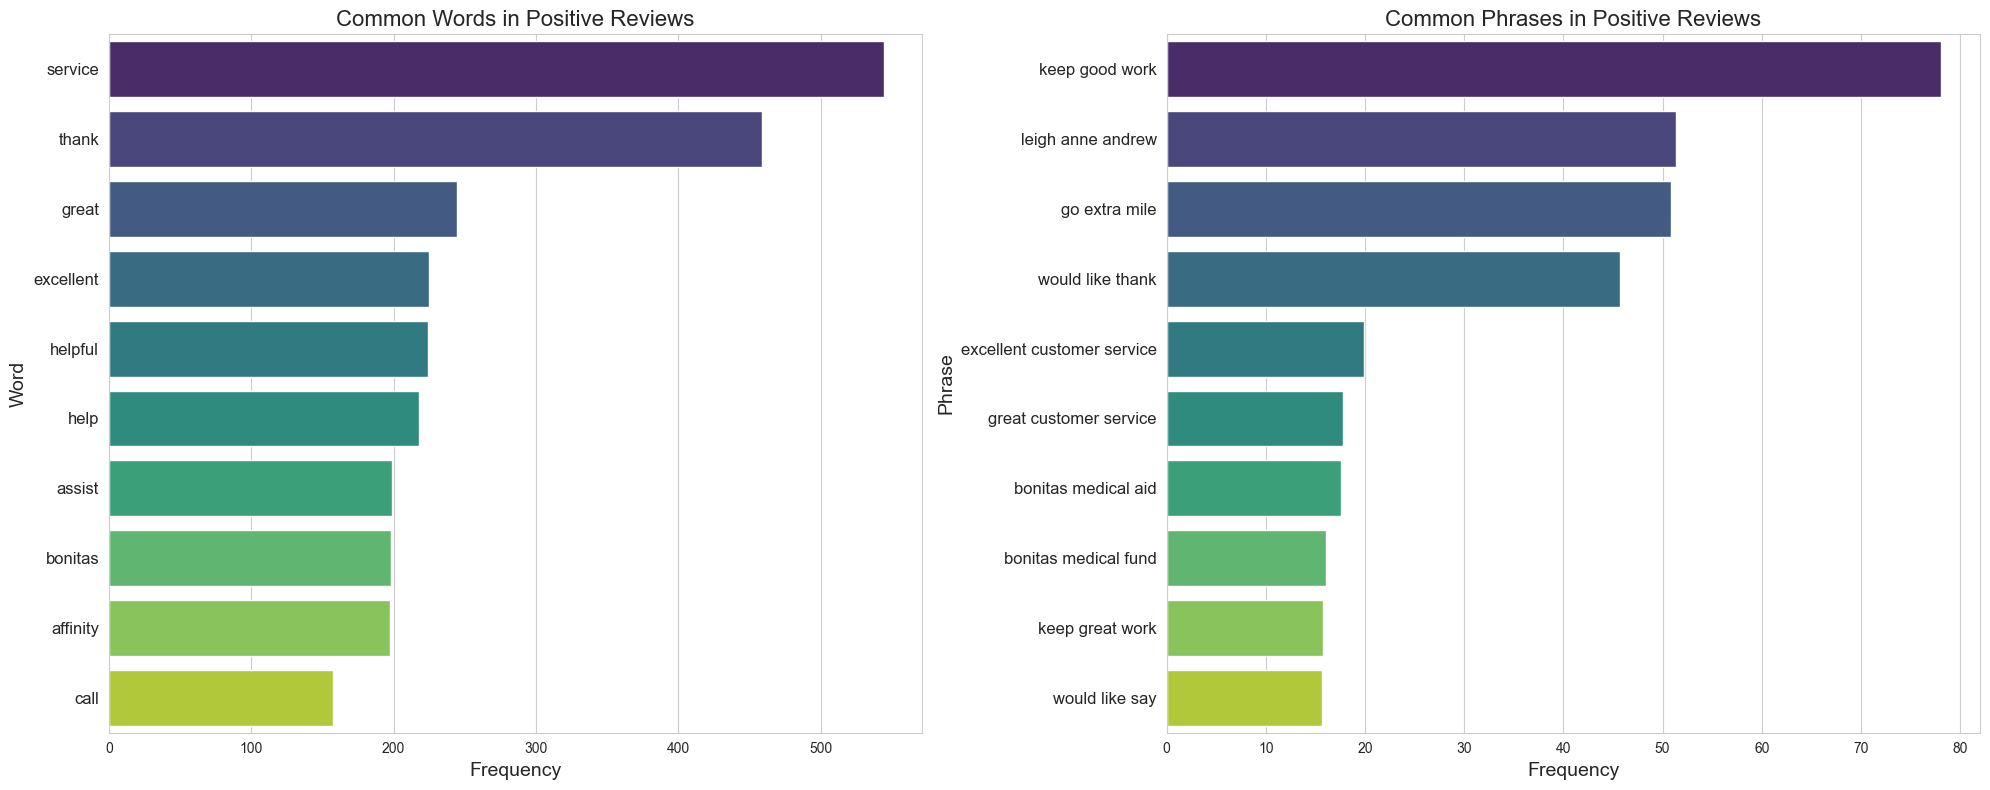

In [417]:
# Set the overall figure size
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  #(Beit, 2021)
# Plot 1 => Common Words
# assign graph to seaborn barplot() method to create a bar plot to visualize the frequency of common words in positive reviews
# data, set to pos_common_words DataFrame
# x, set to 'Frequency' to represent the frequency of each word
# y, set to 'Word' to represent the words on the y-axis
# palette, set to 'viridis' for color scheme
# hue, set to 'Word' to color the bars by word
# ax, set to the first subplot in the 1x2 grid
sns.barplot(data=pos_common_words, x='Frequency', y='Word', palette='viridis', hue='Word', ax=axes[0]) #(Waskom, 2024)
axes[0].set_title('Common Words in Positive Reviews', fontsize=16)
axes[0].set_ylabel('Word', fontsize=14)
axes[0].set_xlabel('Frequency', fontsize=14)
# Adjust  y-axis text size
axes[0].tick_params(axis='y', labelsize=12)
# Plot 2 => Common Phrases
# assign graph to seaborn barplot() method to create a bar plot to visualize the frequency
# of common phrases in positive reviews
# data, set to pos_common_phrases DataFrame
# x, set to 'Frequency' to represent the frequency of each phrase
# y, set to 'Word' to represent the phrases on the y-axis
# palette, set to 'viridis' for color scheme
# hue, set to 'Word' to color the bars by phrase
# ax, set to the second subplot in the 1x2 grid
sns.barplot(data=pos_common_phrases, x='Frequency', y='Word', palette='viridis', hue='Word', ax=axes[1]) #(Waskom, 2024)
axes[1].set_title('Common Phrases in Positive Reviews', fontsize=16)
axes[1].set_ylabel('Phrase', fontsize=14)
axes[1].set_xlabel('Frequency', fontsize=14)
# Adjust  y-axis text size
axes[1].tick_params(axis='y', labelsize=12)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### **Negative Reviews**

In [418]:
# Initialize a new DataFrame to store the negative reviews
neg = df['reviews_processed'][df['review_label'] == 'Negative'].tolist() 
# get common words and phrases from the negative reviews
common_words = get_common_words(neg)
# get common phrases from the negative reviews
common_phrases = get_common_phrases(neg)
# Create a DataFrame to store the words and their frequencies
# pass the sorted words to a DataFrame with columns 'Word' and 'Frequency'
neg_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
neg_common_phrases = pd.DataFrame(common_phrases, columns=['Word', 'Frequency'])


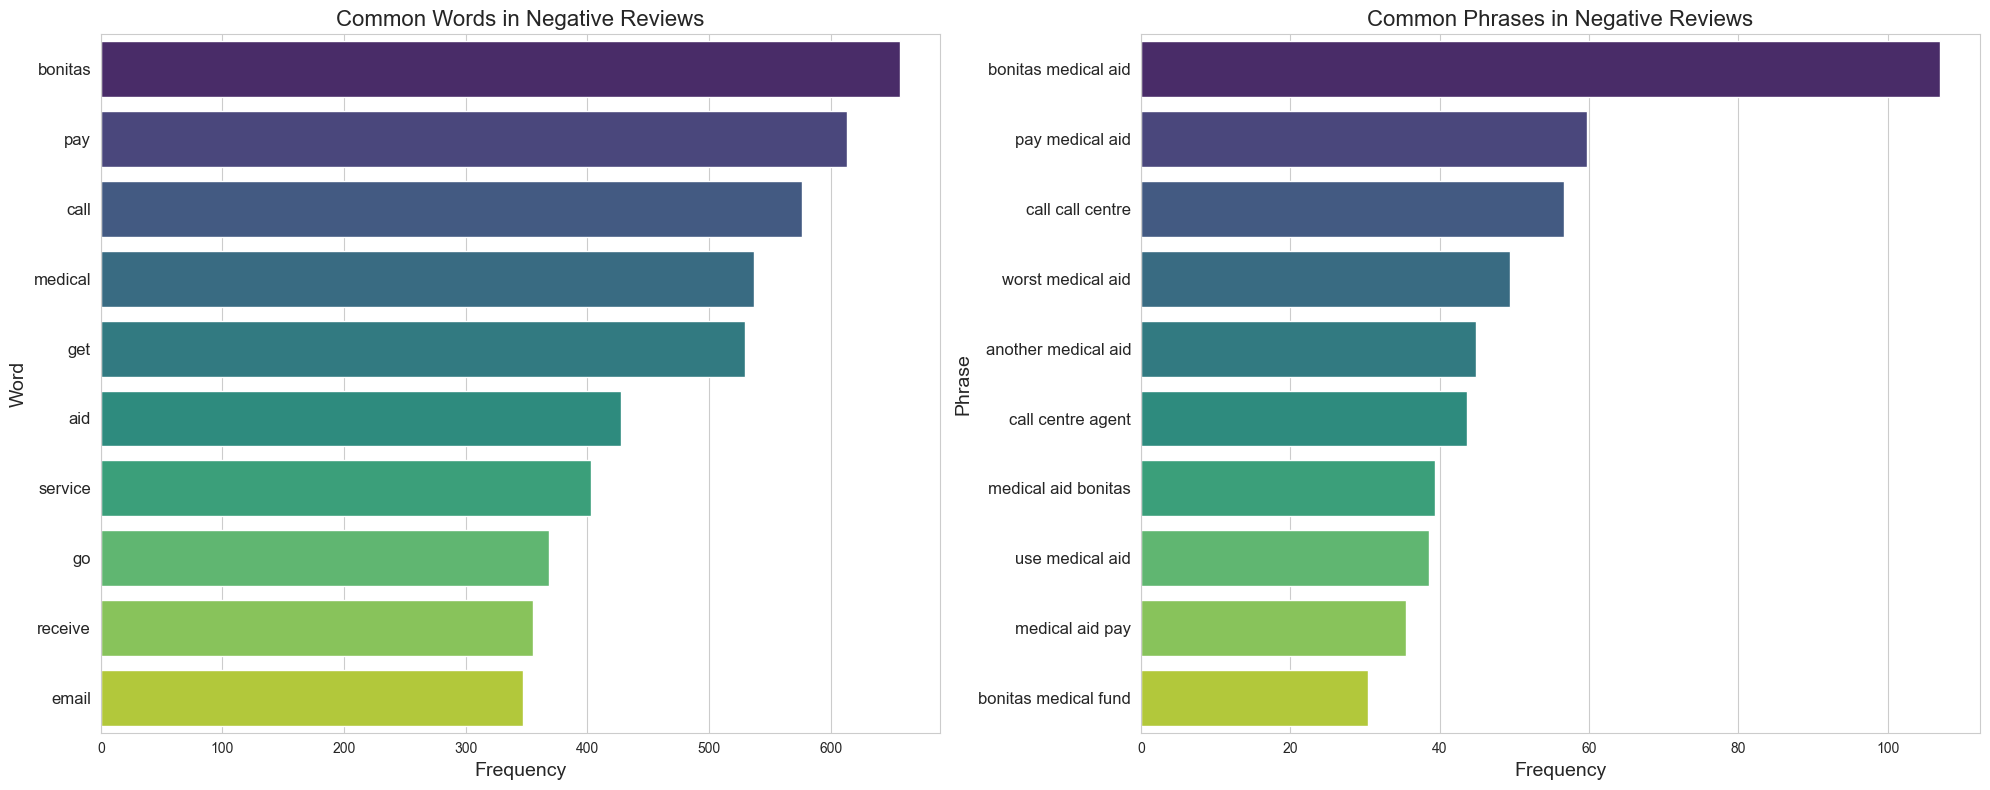

In [419]:
# Set the overall figure size
fig, axes = plt.subplots(1, 2, figsize=(20, 8))  #(Beit, 2021)
# Plot 1 => Common Words
# assign graph to seaborn barplot() method to create a bar plot to visualize the frequency
# of common words in negative reviews
# data, set to neg_common_words DataFrame
# x, set to 'Frequency' to represent the frequency of each word
# y, set to 'Word' to represent the words on the y-axis
# palette, set to 'viridis' for color scheme
# hue, set to 'Word' to color the bars by word
# ax, set to the first subplot in the 1x2 grid
sns.barplot(data=neg_common_words, x='Frequency', y='Word', palette='viridis', hue='Word', ax=axes[0]) #(Waskom, 2024)
axes[0].set_title('Common Words in Negative Reviews', fontsize=16)
axes[0].set_ylabel('Word', fontsize=14)
axes[0].set_xlabel('Frequency', fontsize=14)
# Adjust  y-axis text size
axes[0].tick_params(axis='y', labelsize=12)
# Plot 2 => Common Phrases
# assign graph to seaborn barplot() method to create a bar plot to visualize the frequency
# of common phrases in negative reviews
# data, set to neg_common_phrases DataFrame
# x, set to 'Frequency' to represent the frequency of each phrase
# y, set to 'Word' to represent the phrases on the y-axis
# palette, set to 'viridis' for color scheme
# hue, set to 'Word' to color the bars by phrase
# ax, set to the second subplot in the 1x2 grid
sns.barplot(data=neg_common_phrases, x='Frequency', y='Word', palette='viridis', hue='Word', ax=axes[1]) #(Waskom, 2024)
axes[1].set_title('Common Phrases in Negative Reviews', fontsize=16)
axes[1].set_ylabel('Phrase', fontsize=14)
axes[1].set_xlabel('Frequency', fontsize=14)
# Adjust  y-axis text size
axes[1].tick_params(axis='y', labelsize=12)
# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### **Neutral Reviews**

In [420]:
# Initialize a new DataFrame to store the neutral reviews
neu = df['reviews_processed'][df['review_label'] == 'Neutral'].tolist() 
# get common words and phrases from the neutral reviews
common_words = get_common_words(neu)
# get common phrases from the neutral reviews
common_phrases = get_common_phrases(neu)
# Create a DataFrame to store the words and their frequencies
# pass the sorted words to a DataFrame with columns 'Word' and 'Frequency'
neu_common_words = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
neu_common_phrases = pd.DataFrame(common_phrases, columns=['Word', 'Frequency'])

In [421]:
# vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2))  # or CountVectorizer
# X = vectorizer.fit_transform(neg)
# lda = LatentDirichletAllocation(n_components=5, random_state=42)
# lda.fit(X)
# # Step 1: Get top 10 words per topic
# topics_data = []
# feature_names = vectorizer.get_feature_names_out()

# for topic_idx, topic in enumerate(lda.components_):
#     top_indices = topic.argsort()[-10:][::-1]
#     top_words = [feature_names[i] for i in top_indices]
#     top_scores = topic[top_indices]
#     topics_data.append(pd.DataFrame({
#         'Word': top_words,
#         'Score': top_scores,
#         'Topic': f"Topic {topic_idx}"
#     }))

# # Step 2: Set up subplots
# fig, axes = plt.subplots(1, 5, figsize=(24, 8), sharey=True)
# sns.set_style("whitegrid")

# # Step 3: Plot each topic as horizontal barplot
# for i, df in enumerate(topics_data):
#     sns.barplot(data=df, x='Score', y='Word', palette='viridis', ax=axes[i])
#     axes[i].set_title(f'Topic {i}', fontsize=16)
#     axes[i].set_xlabel('Score', fontsize=12)
#     if i == 0:
#         axes[i].set_ylabel('Word', fontsize=12)
#     else:
#         axes[i].set_ylabel('')
#     axes[i].tick_params(axis='y', labelsize=11)
#     axes[i].tick_params(axis='x', labelsize=10)

# # Step 4: Adjust layout
# plt.suptitle("🔍 Top Words in Each LDA Topic", fontsize=18, weight='bold', y=1.02)
# plt.tight_layout()
# plt.show()


### *Uncover Topics*

In [422]:
def generate_wordcloud(topic_dict, title):
    # Generate a word cloud from the topic dictionary
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_dict)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

In [423]:
#Initialize TfidfVectorizer to convert text data into a matrix of TF-IDF features
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2)) 

#### Positive Reviews 

In [424]:
X = vectorizer.fit_transform(pos)  # Combine all reviews for LDA
# Initialize LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

for index, topic in enumerate(lda.components_):
    print(f"Top words for topic #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")

topic1 = lda.components_[0]
topic2 = lda.components_[1]
topic3 = lda.components_[2]
topic4 = lda.components_[3]
topic5 = lda.components_[4]

topic1Dic = {vectorizer.get_feature_names_out()[i]: topic1[i] for i in topic1.argsort()[-30:]}
topic2Dic = {vectorizer.get_feature_names_out()[i]: topic2[i] for i in topic2.argsort()[-30:]}
topic3Dic = {vectorizer.get_feature_names_out()[i]: topic3[i] for i in topic3.argsort()[-30:]}
topic4Dic = {vectorizer.get_feature_names_out()[i]: topic4[i] for i in topic4.argsort()[-30:]}
topic5Dic = {vectorizer.get_feature_names_out()[i]: topic5[i] for i in topic5.argsort()[-30:]}



Top words for topic #0
['best', 'appreciate', 'quick', 'answer', 'help', 'friendly', 'assistance', 'question', 'service', 'thank']


Top words for topic #1
['consultant', 'go', 'great', 'bonitas', 'maxcine page', 'page', 'service', 'maxcine', 'thank', 'help']


Top words for topic #2
['much', 'great service', 'efficient', 'friendly', 'great', 'professional', 'thank', 'excellent service', 'excellent', 'service']


Top words for topic #3
['call', 'good', 'affinity health', 'medical', 'health', 'great', 'bonitas', 'thank', 'affinity', 'service']


Top words for topic #4
['great', 'keep', 'work', 'thuthuka', 'assist', 'good', 'tshegofatso', 'service', 'thank', 'helpful']




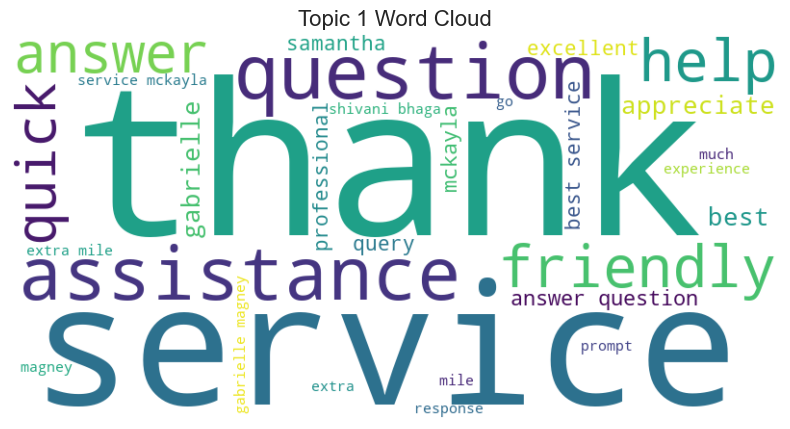

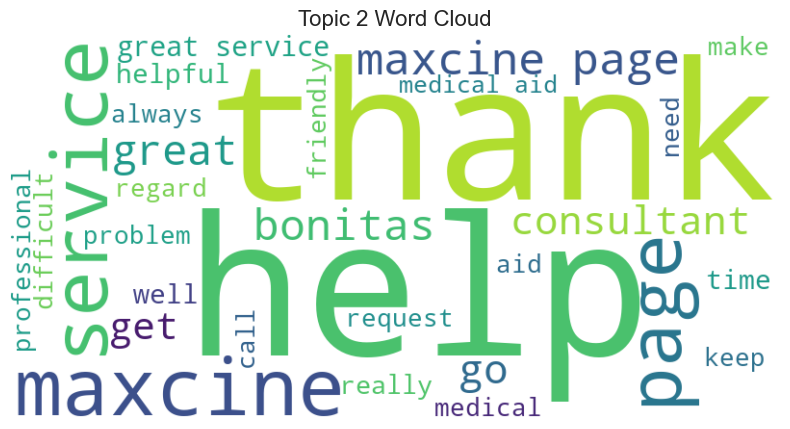

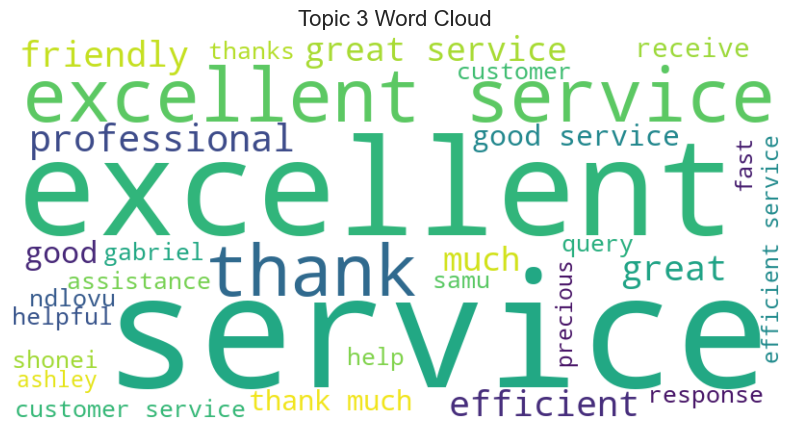

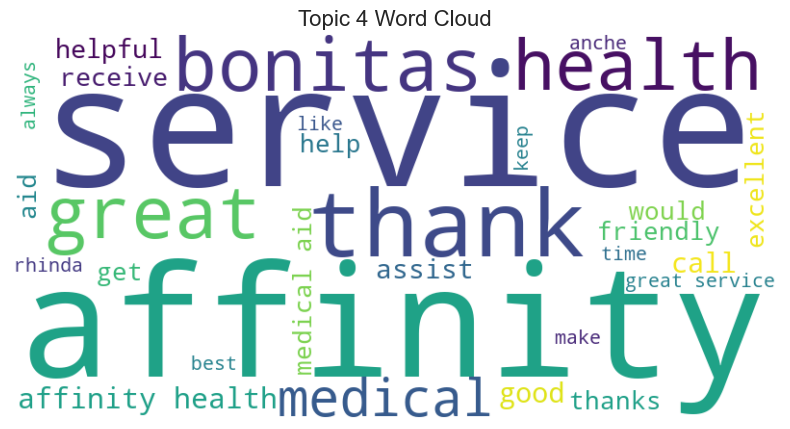

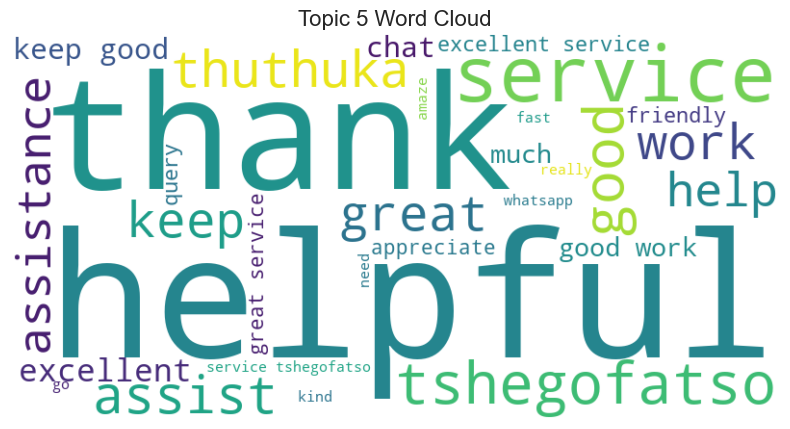

In [425]:
for topic_dict, title in zip([topic1Dic, topic2Dic, topic3Dic, topic4Dic, topic5Dic],
                             [f'Topic 1 Word Cloud', f'Topic 2 Word Cloud', f'Topic 3 Word Cloud',
                              f'Topic 4 Word Cloud', f'Topic 5 Word Cloud']):
    generate_wordcloud(topic_dict, title)

#### Neutral Reviews 

In [426]:
#vectorizer = CountVectorizer(max_features=3000)
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2))  # Use TF-IDF for better representation
X = vectorizer.fit_transform(neu)  # Combine all reviews for LDA
# Initialize LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

for index, topic in enumerate(lda.components_):
    print(f"Top words for topic #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")

topic1 = lda.components_[0]
topic2 = lda.components_[1]
topic3 = lda.components_[2]
topic4 = lda.components_[3]
topic5 = lda.components_[4]

topic1Dic = {vectorizer.get_feature_names_out()[i]: topic1[i] for i in topic1.argsort()[-30:]}
topic2Dic = {vectorizer.get_feature_names_out()[i]: topic2[i] for i in topic2.argsort()[-30:]}
topic3Dic = {vectorizer.get_feature_names_out()[i]: topic3[i] for i in topic3.argsort()[-30:]}
topic4Dic = {vectorizer.get_feature_names_out()[i]: topic4[i] for i in topic4.argsort()[-30:]}
topic5Dic = {vectorizer.get_feature_names_out()[i]: topic5[i] for i in topic5.argsort()[-30:]}



Top words for topic #0
['hospital', 'bonitas', 'back', 'medical', 'affinity', 'thank', 'amount', 'want', 'pay', 'claim']


Top words for topic #1
['efficient professional', 'bonitas', 'pay', 'year', 'specialist', 'lancet', 'basic', 'service', 'great', 'great service']


Top words for topic #2
['much', 'option', 'problem', 'claim', 'fast', 'thank much', 'ann', 'medication', 'nice', 'wait']


Top words for topic #3
['month', 'gynae', 'aid', 'pay', 'provide', 'call', 'refund', 'medical', 'prepare', 'bonitas']


Top words for topic #4
['pay', 'professional', 'help', 'thank', 'pharmacy', 'hospital', 'bonitas', 'service', 'call', 'get']




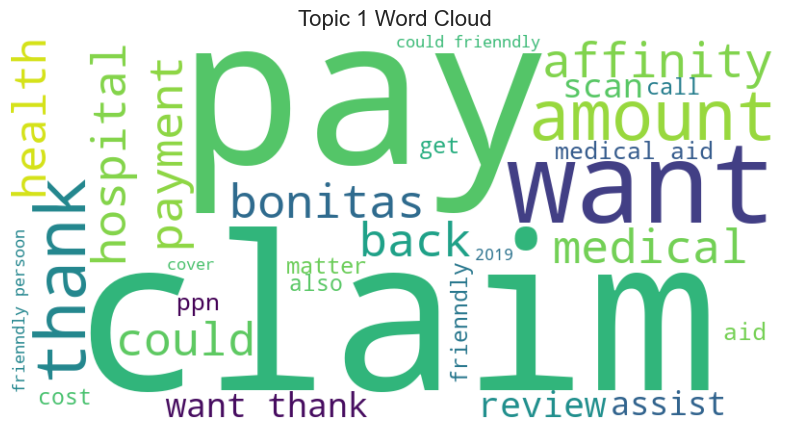

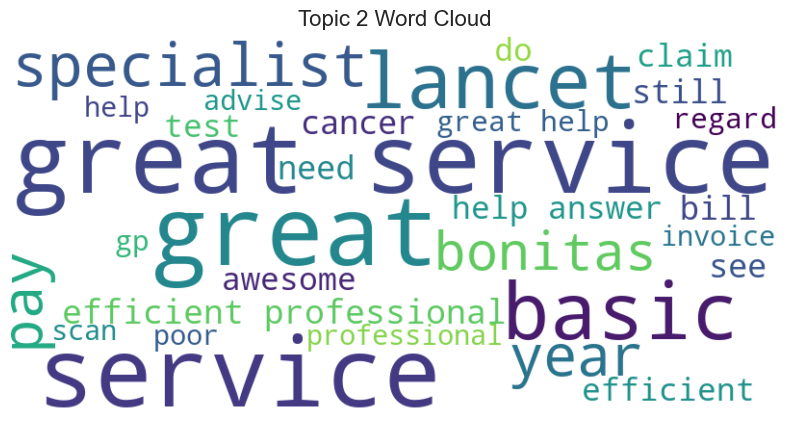

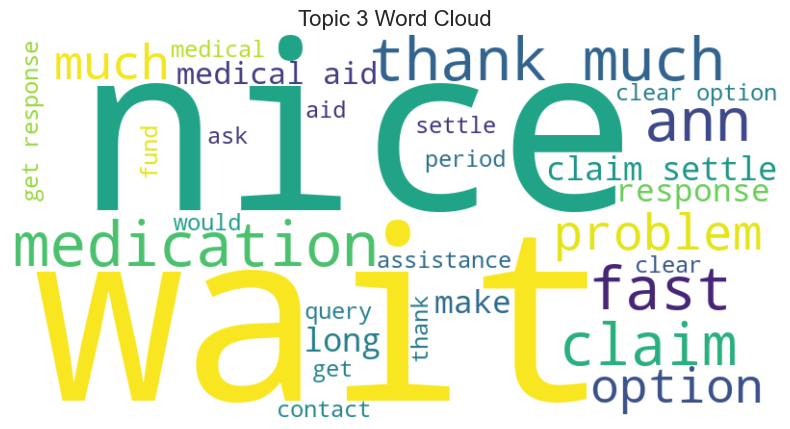

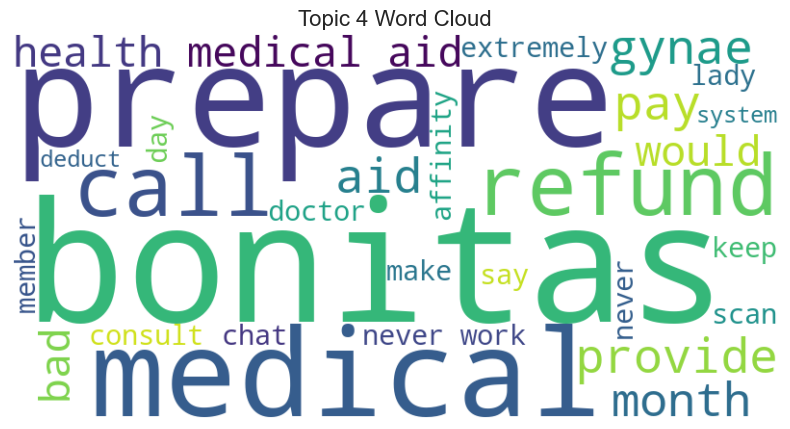

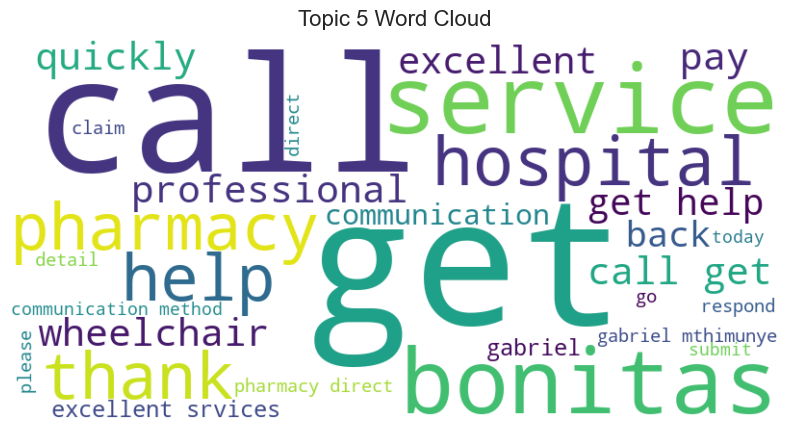

In [427]:
for topic_dict, title in zip([topic1Dic, topic2Dic, topic3Dic, topic4Dic, topic5Dic],
                             [f'Topic 1 Word Cloud', f'Topic 2 Word Cloud', f'Topic 3 Word Cloud',
                              f'Topic 4 Word Cloud', f'Topic 5 Word Cloud']):
    generate_wordcloud(topic_dict, title)

#### Negative Reviews 

In [428]:
#vectorizer = CountVectorizer(max_features=3000)
vectorizer = TfidfVectorizer(max_features=3000, ngram_range=(1,2))  # Use TF-IDF for better representation
X = vectorizer.fit_transform(neg)  # Combine all reviews for LDA
# Initialize LDA model
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

for index, topic in enumerate(lda.components_):
    print(f"Top words for topic #{index}")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")

topic1 = lda.components_[0]
topic2 = lda.components_[1]
topic3 = lda.components_[2]
topic4 = lda.components_[3]
topic5 = lda.components_[4]

topic1Dic = {vectorizer.get_feature_names_out()[i]: topic1[i] for i in topic1.argsort()[-30:]}
topic2Dic = {vectorizer.get_feature_names_out()[i]: topic2[i] for i in topic2.argsort()[-30:]}
topic3Dic = {vectorizer.get_feature_names_out()[i]: topic3[i] for i in topic3.argsort()[-30:]}
topic4Dic = {vectorizer.get_feature_names_out()[i]: topic4[i] for i in topic4.argsort()[-30:]}
topic5Dic = {vectorizer.get_feature_names_out()[i]: topic5[i] for i in topic5.argsort()[-30:]}


Top words for topic #0
['baby pack', 'thank', 'boot', 'pack', 'please call', 'brace', 'baby bag', 'block number', 'bag', 'excellent']


Top words for topic #1
['stop call', 'med', 'use pharmacy', 'deliver', 'chronic medication', 'chronic', 'medication', 'direct', 'pharmacy direct', 'pharmacy']


Top words for topic #2
['email', 'service', 'claim', 'medical aid', 'aid', 'get', 'medical', 'call', 'pay', 'bonitas']


Top words for topic #3
['number', 'stop', 'report', 'multiple', 'true', 'spam', '2021 09', 'desre', 'tumor', 'oxygen']


Top words for topic #4
['spec saver', 'service absolutely', 'spec', 'wisdom teeth', 'saver', 'oncology benefit', 'wisdom', 'benefit booster', 'harass', 'booster']




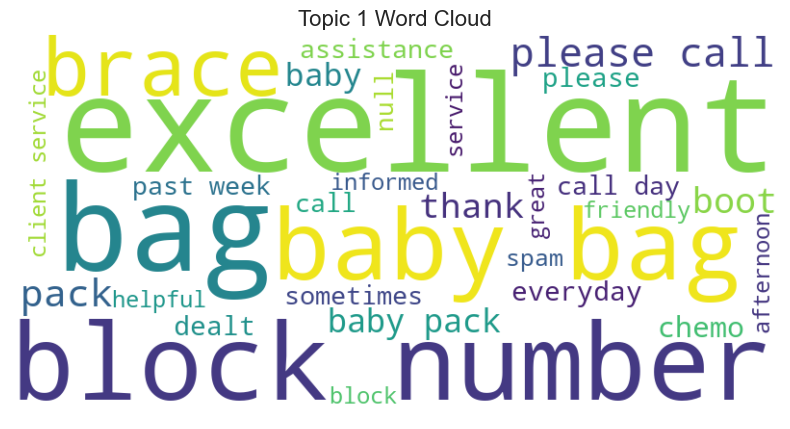

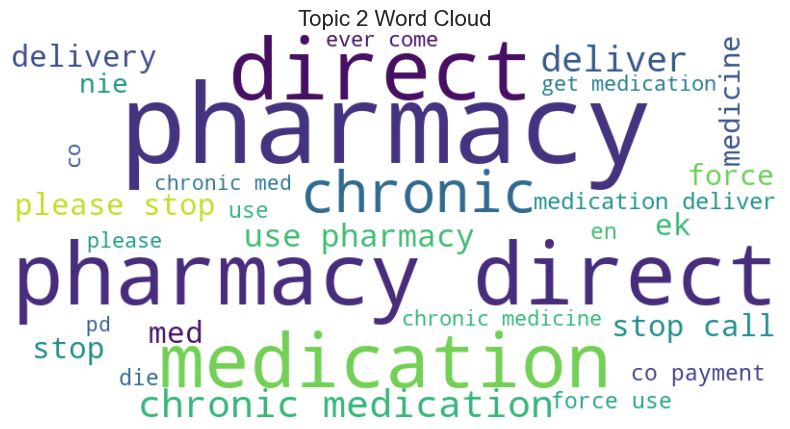

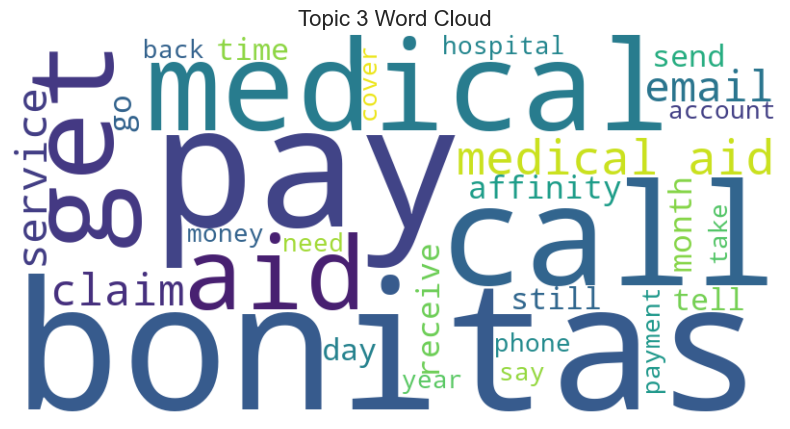

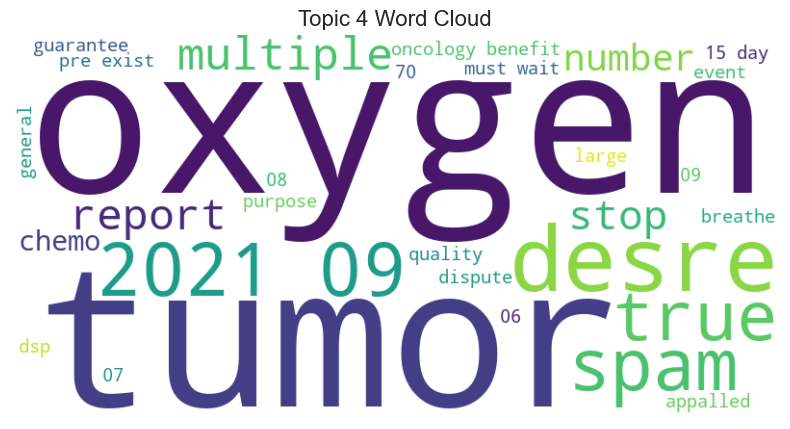

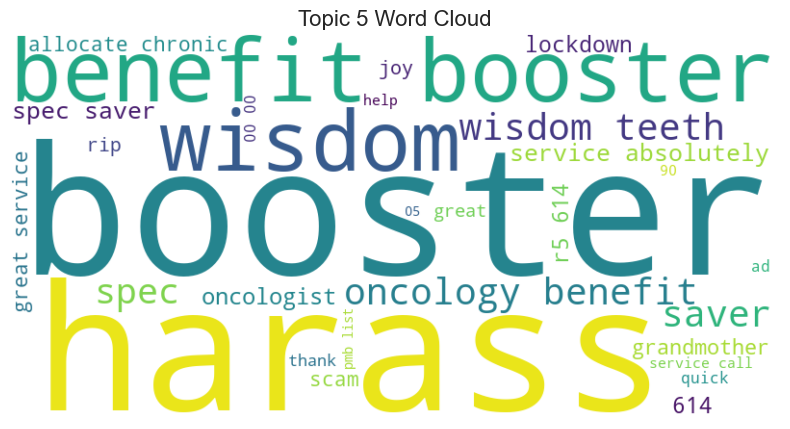

In [429]:
for topic_dict, title in zip([topic1Dic, topic2Dic, topic3Dic, topic4Dic, topic5Dic],
                             [f'Topic 1 Word Cloud', f'Topic 2 Word Cloud', f'Topic 3 Word Cloud',
                              f'Topic 4 Word Cloud', f'Topic 5 Word Cloud']):
    generate_wordcloud(topic_dict, title)

### **Model Buliding**

In [511]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4925 entries, 0 to 4924
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   review_rating        4925 non-null   int64  
 1   review_content       4925 non-null   object 
 2   review_length        4925 non-null   int64  
 3   word_count           4925 non-null   int64  
 4   avg_sentence_length  4925 non-null   float64
 5   review_label         4925 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 231.0+ KB


In [514]:
# drop all rows where review_label = 'Neutral'
df = df[df['review_label'] != 2]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2895 entries, 0 to 4316
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   review_rating        2895 non-null   int64  
 1   review_content       2895 non-null   object 
 2   review_length        2895 non-null   int64  
 3   word_count           2895 non-null   int64  
 4   avg_sentence_length  2895 non-null   float64
 5   review_label         2895 non-null   int64  
 6   reviews_processed    2895 non-null   object 
dtypes: float64(1), int64(4), object(2)
memory usage: 180.9+ KB


In [516]:
# Initialize TfidfVectorizer to convert text data into a matrix of TF-IDF features
# max features is set to 3000 to limit the number of features
# min_df is set to 7 to ignore terms that appear in less than 7 reviews
# max_df is set to 0.8 to ignore terms that appear in more than 80% of the reviews
tfidf_vectorizer = TfidfVectorizer(max_features=3000, min_df=7, max_df=0.8)
X_tfidf = tfidf_vectorizer.fit_transform(df['reviews_processed'])

#encode the sentiment labels into numerical values
# LabelEncoder is used to convert categorical labels into numerical values
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# fit_transform() method is used to fit the label encoder to the sentiment labels and transform them into numerical values
df['review_label'] = label_encoder.fit_transform(df['review_label'])

In [517]:
# Split the data into training and testing sets
# set X to the TF-IDF matrix and y to the review labels
X = X_tfidf
y = df['review_label']
# Use train_test_split to split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42, stratify=y)


In [518]:
from imblearn.pipeline import Pipeline 
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

# Define pipelines (same as you had)
lr_pipeline = Pipeline(steps=[
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42))
])

svm_pipeline = Pipeline(steps=[
    ('smote', SMOTE(sampling_strategy='minority', random_state=42)),
    ('svm', SVC(kernel='linear', class_weight='balanced', probability=True, random_state=42))
])

# Define scoring dictionary
scor = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='binary',),
    'recall': make_scorer(recall_score, average='binary'),
    'f1': make_scorer(f1_score, average='binary')
}

# Cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Use cross_validate to get multiple metrics
lr_scores = cross_validate(lr_pipeline, X_tfidf, y, scoring=scor, cv=cv)
svm_scores = cross_validate(svm_pipeline, X_tfidf, y, scoring=scor, cv=cv)

# Print results
print("Logistic Regression Mean Scores:")
for metric in scor:
    print(f"{metric.capitalize()}: {np.mean(lr_scores['test_' + metric]):.4f}")

print("\nSVM Mean Scores:")
for metric in scor:
    print(f"{metric.capitalize()}: {np.mean(svm_scores['test_' + metric]):.4f}")


Logistic Regression Mean Scores:
Accuracy: 0.9523
Precision: 0.3451
Recall: 0.3819
F1: 0.3613

SVM Mean Scores:
Accuracy: 0.9599
Precision: 0.4044
Recall: 0.2733
F1: 0.3209


In [519]:

# Counting the number of instances in each class before oversampling
counter = Counter(y_train)
print('Before', counter)

# Oversampling the train dataset using SMOTE 
smote=SMOTE(sampling_strategy='minority')
X_train_smtom, y_train_smtom = smote.fit_resample(X, y)

# Counting the number of instances in each class after oversampling
counter = Counter(y_train_smtom)
print('After', counter)

Before Counter({0: 2234, 1: 82})
After Counter({0: 2793, 1: 2793})


In [520]:

# Initialize and train Logistic Regression model
lr_model = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)
#lr_model.fit(X_train, y_train)
lr_model.fit(X_train_smtom, y_train_smtom)




LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [521]:
from sklearn.model_selection import GridSearchCV
svm_model = SVC(kernel='rbf',  random_state=42, C=10, gamma=1, class_weight='balanced')
#svm_model.fit(X_train, y_train)
svm_model.fit(X_train_smtom, y_train_smtom)

SVC(C=10, class_weight='balanced', gamma=1, random_state=42)

In [ ]:

#Best Hyperparameters: {'C': 10, 'gamma': 1, 'kernel': 'rbf'}

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': [0.1, 1, 'scale', 'auto']
}
# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5)


# Fit the model with the grid of hyperparameters
grid_search.fit(X_train, y_train)


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

param_dist = {
    'C': uniform(0.1, 10),  # Uniform distribution between 0.1 and 10
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'] + list(np.logspace(-3, 3, 50))
}
randomized_search = RandomizedSearchCV(estimator=svm_model, param_distributions=param_dist, n_iter=20, cv=5)

randomized_search.fit(X_train, y_train)

In [528]:
# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
# Evaluate the best model
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
print(f"Best Hyperparameters: {best_params}")

NameError: name 'grid_search' is not defined

In [ ]:
# Define Stratified K-Fold (to keep class proportions)
kf2 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
evaluate_model_cvv(pipeline,X_test, y_test, kf2)

In [ ]:
def evaluate_model_cvv(model, X, y, cv):
    scoring = {
        'accuracy': 'accuracy',
        'precision': make_scorer(precision_score, average='macro', zero_division=1),
        'recall': make_scorer(recall_score, average='macro', zero_division=1),
        'f1': make_scorer(f1_score, average='macro', zero_division=1)
    }
    scores = cross_validate(model, X, y, cv=cv, scoring=scoring)

    print("="*40)
    print("Cross-validation scores:")
    for i in range(len(scores['test_f1'])):
        print(f"Fold {i+1}: F1 Score = {scores['test_f1'][i]:.4f}, "
              f"Accuracy = {scores['test_accuracy'][i]:.4f}, "
              f"Precision = {scores['test_precision'][i]:.4f}, "
              f"Recall = {scores['test_recall'][i]:.4f}")
    print("="*40)
    print("\nAverage Scores across all folds:")
    print(f"F1 Score: {np.mean(scores['test_f1']):.4f}")
    print(f"Accuracy Score: {np.mean(scores['test_accuracy']):.4f}")
    print(f"Precision Score: {np.mean(scores['test_precision']):.4f}")
    print(f"Recall Score: {np.mean(scores['test_recall']):.4f}")

### **Model Evaluation**

To evaluate the performance of the model’s performance metrics, such as accuracy, precision, recall, and f1 score 

- Accuracy: The score is a measure of the model’s overall ability to produce correct predictions. It calculates the ratio of correct predictions over the total number of predictions made (Martin Ward Powers, 2011). 

- Precision: This score is an indication of the model’s ability to correctly produce and identify positive predictions. The measure evaluates the number of true positive predictions out of all the prediction that were classified as positive (Martin Ward Powers, 2011). 

- Recall: This score is an indication of how well the model can identify positive classifications. The measure evaluates the number of actual positive outcomes that were correctly predicted as positive by the model (Martin Ward Powers, 2011).

- F1-score: This score combined the average precision and recall. Effectively the model balances he precision and recall. It evaluates the overall performance of a model when the positive and negative classifications are unbalanced (Martin Ward Powers, 2011). 


In [524]:
# function to evaluate the model using cross-validation
def evaluate_model_cv(model, X, y, kf2):   # (Ryan & Matt Data Science, 2023)
   # set the scoring metrics for cross-validation
    # scoring = {
    #     'accuracy': 'accuracy',
    #     'precision': make_scorer(precision_score),
    #     'recall': make_scorer(recall_score),
    #     'f1': make_scorer(f1_score)
    # }
    
    scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro', zero_division=1),
    'recall': make_scorer(recall_score, average='macro', zero_division=1),
    'f1': make_scorer(f1_score, average='macro', zero_division=1)
      }
    # perform cross-validation using the specified model, data, and scoring metrics
    kfScore = cross_validate(model, X, y, cv=kf2, scoring=scoring) # (Ryan & Matt Data Science, 2023)
   
   # print the cross-validation scores for each fold
    print("="*40) 
    print("Cross-validation scores:") # (Ryan & Matt Data Science, 2023)     
    for i in range(len(kfScore['test_f1'])):
          print(f"Fold {i+1}: "
          f"F1 Score = {kfScore['test_f1'][i]:.4f}, "
          f"Accuracy = {kfScore['test_accuracy'][i]:.4f}, "
          f"Precision = {kfScore['test_precision'][i]:.4f}, "
          f"Recall = {kfScore['test_recall'][i]:.4f}")    
    print("="*40)
    #print the average scores across all folds
    print("\nAverage Scores across all folds:")  # (Ryan & Matt Data Science, 2023)
    print(f"F1 Score: {np.mean(kfScore['test_f1'])}")
    print(f"Accuracy Score: {np.mean(kfScore['test_accuracy'])}")
    print(f"Precision Score: {np.mean(kfScore['test_precision'])}")
    print(f"Recall Score: {np.mean(kfScore['test_recall'])}")
   

In [523]:
def evaluate_model(model, X_train, X_test, y_train, y_test): # (Ryan & Matt Data Science, 2023)
  
    print("Train Accuracy:", model.score(X_train, y_train))

    y_pred = model.predict(X_test)# (Ryan & Matt Data Science, 2023)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred,average='macro')
    precision = precision_score(y_test, y_pred,average='macro')
    f1 = f1_score(y_test, y_pred,average='macro')
    
    print("Test Accuracy Scorces")
    print(f"Accuracy:  {accuracy:.2f}")
    print(f"Recall:    {recall:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"F1 Score:  {f1:.2f}")

In [531]:
# evaluate the model using cross-validation
evaluate_model_cv(lr_model,  X_train_smtom, y_train_smtom, kf2=StratifiedKFold(n_splits=5, shuffle=True, random_state=23)) # (Ryan & Matt Data Science, 2023)


Cross-validation scores:
Fold 1: F1 Score = 0.9875, Accuracy = 0.9875, Precision = 0.9878, Recall = 0.9875
Fold 2: F1 Score = 0.9821, Accuracy = 0.9821, Precision = 0.9825, Recall = 0.9821
Fold 3: F1 Score = 0.9785, Accuracy = 0.9785, Precision = 0.9794, Recall = 0.9785
Fold 4: F1 Score = 0.9866, Accuracy = 0.9866, Precision = 0.9869, Recall = 0.9866
Fold 5: F1 Score = 0.9812, Accuracy = 0.9812, Precision = 0.9819, Recall = 0.9812

Average Scores across all folds:
F1 Score: 0.9831665736179837
Accuracy Score: 0.9831714453646123
Precision Score: 0.9836948649822184
Recall Score: 0.9831720750700497


In [532]:
evaluate_model(lr_model, X_train_smtom, X_test, y_train_smtom, y_test) # (Ryan & Matt Data Science, 2023)

Train Accuracy: 0.9899749373433584
Test Accuracy Scorces
Accuracy:  0.98
Recall:    0.99
Precision: 0.83
F1 Score:  0.90


In [526]:
evaluate_model(svm_model, X_train_smtom, X_test, y_train_smtom, y_test) # (Ryan & Matt Data Science, 2023)

Train Accuracy: 1.0
Test Accuracy Scorces
Accuracy:  1.00
Recall:    1.00
Precision: 1.00
F1 Score:  1.00


In [527]:
# evaluate the model using cross-validation
#evaluate_model_cv(svm_model, X, y, kf2=StratifiedKFold(n_splits=5, shuffle=True, random_state=23)) # (Ryan & Matt Data Science, 2023)

evaluate_model_cv(best_model, X, y, kf2=StratifiedKFold(n_splits=5, shuffle=True, random_state=23)) # (Ryan & Matt Data Science, 2023)


NameError: name 'best_model' is not defined

The cross validation indicates that the models performance remains consistent across different fold of data. Therefore model can  generalise well on unseen data
- Accuracy: The model can correctly make prediction for Diagnosis for 82% of all instances ( for both cancer = 1 and no cancer = 0)
- Precision: Out of all predictions, the model identified 74% of instances as a postives cancer diagnosis ( cancer = 1)
- Recall: The model correctly identified 82% of actual instances of postives cancer diagnosis ( cancer = 1)
- F1-score: The scorce 77%, indicates the model has a good balance in identifiing of instances of postives cancer diagnosis ( cancer = 1) and false positives.

#### *Confusion Matrix*
A confusion matrix is used to assess a classification models performance, by comparing the predicted values against the actual values. In a grid, it displays the number of incorrect and correct predictions made by the model.  Which enables a visual illustration of the model performance evaluation metrics, such as accuracy, recall, precision and F1 score(Murel and Kavlakoglu, 2024).

In [ ]:
# Cross-validation using KFold
kf2 = KFold(n_splits=5, shuffle=True, random_state=23) # (Ryan & Matt Data Science, 2023)
# get predictions using cross-validation
predictions = cross_val_predict(lrModel, X, y, cv=kf2) #(Chaudhary, 2019; GeeksforGeeks, 2025b) 

# create a confusion matrix to evaluate the predictions
cm = confusion_matrix(y, predictions)
# create plot to visualize the confusion matrix
# using ConfusionMatrixDisplay 
conMatrix = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Cancer', 'Cancer'])
conMatrix.plot(cmap="Greens") 
plt.title("Confusion Matrix from 5-Fold Cross-Validated Predictions")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


##### *True Positive (TP)*
(Top-left box)\
The model was able to correctly predict 782 instances of a positive cancer diagnosis.\
782 individuals who did have cancer were correctly identified as having cancer.
##### *False Negative (FN)*
(Top-right box)\
The model incorrectly predicted 162  instances of a negative cancer diagnosis.\
162 individuals who had cancer were misclassified ,as not having cancer. 
##### *False Positive (FP)*
(Bottom-left box)\
The model incorrectly predicted 102 instances of a positive cancer diagnosis.\
102 individuals who did not have cancer were misclassified, as having cancer

##### *True Negative (TN)*
(Bottom-right box) \
The model was able to correctly predict 455 instances of a negative cancer diagnosis.\
455 individuals who did not have cancer were correctly identified as not having cancer.

The Precision-Recall Curve is used to assess the performance of a model, by analysing  its ability to predict the positive class. This makes it useful for unbalanced datasets. The Precision-Recall Curve evaluates the relationship between precision and recall at different thresholds, from 0 to 1. The curve is plotted by estimates of precision-recall pair at these various thresholds. To provide insight into the trade-off between the two metrics. This assists in selecting the best threshold that balances precision and recall in the model (Lyzer, 2024). 

In [ ]:
# Get predicted probabilities for the positive class (label 1)
y_prob_test = lrModel.predict_proba(X_test)[:, 1] #(Huilgol, 2024; scikit-learn developers, 2025d)
# calculate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_test) #(Huilgol, 2024; scikit-learn developers, 2025d)
# create a PrecisionRecallDisplay object to plot the precision-recall curve
preCurve = PrecisionRecallDisplay(precision=precision, recall=recall) #(Huilgol, 2024; scikit-learn developers, 2025d)
preCurve.plot()
# set fill color and transparency for the area under the curve
plt.fill_between(recall, precision, color="#4E055F", alpha=0.3)
# set the title and labels for the plot
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
# set grid lines for the plot
plt.grid(True)
# display the plot
plt.show()

In [ ]:
# Get predicted probabilities for the positive class (label 1)
y_scores = cross_val_predict(lrModel, X, y, cv=kf2, method='predict_proba')[:, 1] #(Huilgol, 2024; scikit-learn developers, 2025d)
precision, recall, thresholds = precision_recall_curve(y, y_scores) 
# create a PrecisionRecallDisplay object to plot the precision-recall curve
preCurve = PrecisionRecallDisplay(precision=precision, recall=recall)#(Huilgol, 2024; scikit-learn developers, 2025d)
preCurve.plot()
# set fill color and transparency for the area under the curve
plt.fill_between(recall, precision, color="#4E055F", alpha=0.3) 
# set the title and labels for the plot
plt.title('Precision-Recall Curve (Cross-Validation)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

The x-axis represents recall, the proportion of the positive class that was correctly predicted.
The y-axis represents precision, the total number of the positive class that model has predicted.
The plots shows that the model has a high precision even as recall increases, only dropping off at very high recall. The area under the curve is large, this indiactes the model performance well.

### **References**

Beit, L., 2021. An Introduction to Subplots in Matplotlib | by Lili Beit | Analytics Vidhya | Medium. [online] Available at: <https://medium.com/analytics-vidhya/an-introduction-to-subplots-in-matplotlib-b8b4821b47d1> [Accessed 29 May 2025].
Chaudhary, S., 2019. Confusion Matrix. When you train your models for… | by Sumit Chaudhary | Medium. [online] Available at: <https://medium.com/%40EduardoSaverin/confusion-matrix-614be4ff4c9e> [Accessed 29 May 2025].
GeeksforGeeks, 2025a. Detect and Remove the Outliers using Python | GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/> [Accessed 29 May 2025].
GeeksforGeeks, 2025b. How to Plot Confusion Matrix with Labels in Sklearn? | GeeksforGeeks. [online] Available at: <https://www.geeksforgeeks.org/how-to-plot-confusion-matrix-with-labels-in-sklearn/> [Accessed 29 May 2025].
Guerrini, T., 2021. Overlapping Density/Histogram Plots in Python. [online] Available at: <https://www.kaggle.com/code/tomwarrens/overlapping-density-histogram-plots-in-python> [Accessed 29 May 2025].
Huilgol, P., 2024. Precision and Recall in Machine Learning - Analytics Vidhya. [online] Available at: <https://www.analyticsvidhya.com/articles/precision-and-recall-in-machine-learning/> [Accessed 29 May 2025].
Jain, A., 2024. Unveiling the Power of Heatmaps in Data Visualization | by Abhishek Jain | Medium. [online] Available at: <https://medium.com/@abhishekjainindore24/unveiling-the-power-of-heatmaps-in-data-visualization-8b370efca935> [Accessed 25 April 2025].
Joblib developers, 2021. joblib.dump — joblib 1.6.dev0 documentation. [online] Available at: <https://joblib.readthedocs.io/en/latest/generated/joblib.dump.html> [Accessed 29 May 2025].
Kramer, N., 2024. Scikit-Learn Pipelines: Build, Optimize, Explain. [online] Available at: <https://daily.dev/blog/scikit-learn-pipelines-build-optimize-explain?utm_source=chatgpt.com> [Accessed 29 May 2025].
Lyzer, 2024. Understanding Precision-Recall Curve: Visualizing Model Performance. [online] Available at: <https://www.lyzr.ai/glossaries/precision-recall-curve/?utm_source=chatgpt.com> [Accessed 29 May 2025].
Matplotlib development team, 2025. matplotlib.ticker — Matplotlib 3.10.3 documentation. [online] Available at: <https://matplotlib.org/stable/api/ticker_api.html> [Accessed 29 May 2025].
Minitab, 2025. Interpret the key results for Chi-Square Test for Association - Minitab. [online] Available at: <https://support.minitab.com/en-us/minitab/help-and-how-to/statistics/tables/how-to/chi-square-test-for-association/interpret-the-results/key-results/> [Accessed 28 May 2025].
Murel, J. and Kavlakoglu, E., 2024. What is a confusion matrix? | IBM. [online] Available at: <https://www.ibm.com/think/topics/confusion-matrix> [Accessed 28 May 2025].
NumFOCUS Inc, 2025. pandas - Python Data Analysis Library. [online] Available at: <https://pandas.pydata.org/> [Accessed 24 April 2025].
NumPy team, 2025. NumPy. [online] Available at: <https://numpy.org/> [Accessed 24 April 2025].
Plotly, 2025a. Bar charts in Python. [online] Available at: <https://plotly.com/python/bar-charts/> [Accessed 29 May 2025].
Plotly, 2025b. Distplots in Python. [online] Available at: <https://plotly.com/python/distplot/> [Accessed 29 May 2025].
Plotly, 2025c. Plotly express in Python. [online] Available at: <https://plotly.com/python/plotly-express/> [Accessed 29 May 2025].
Rihaldijiran, V., 2024. Chi-Squared Test: Revealing Hidden Patterns in Your Data | Towards Data Science. [online] Available at: <https://towardsdatascience.com/chi-squared-test-revealing-hidden-patterns-in-your-data-d939df2dda71/> [Accessed 28 May 2025].
Roepke, B., 2024. Don’t Get Caught in the Trap of Imbalanced Data When Building a Model. [online] Available at: <https://dataknowsall.com/blog/imbalanced.html?utm_source=chatgpt.com> [Accessed 28 May 2025].
Ryan & Matt Data Science, 2023. A Comprehensive Guide to Cross-Validation with Scikit-Learn and Python - YouTube. [online] Available at: <https://www.youtube.com/watch?v=glLNo1ZnmPA&t=567s> [Accessed 29 May 2025].
Sakkaf, Y., 2020. Chi-Squared Test for Feature Selection with implementation in Python | by Yaser Sakkaf | TDS Archive | Medium. [online] Available at: <https://medium.com/data-science/chi-squared-test-for-feature-selection-with-implementation-in-python-65b4ae7696db> [Accessed 29 May 2025].
scikit-learn developers, 2025a. LogisticRegression — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html> [Accessed 29 May 2025].
scikit-learn developers, 2025b. mutual_info_classif — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif> [Accessed 29 May 2025].
scikit-learn developers, 2025c. Pipeline — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html> [Accessed 29 May 2025].
scikit-learn developers, 2025d. Precision-Recall — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html> [Accessed 29 May 2025].
scikit-learn developers, 2025e. sklearn.metrics — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/api/sklearn.metrics.html> [Accessed 25 April 2025].
scikit-learn developers, 2025f. sklearn.model_selection — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/api/sklearn.model_selection.html> [Accessed 25 April 2025].
scikit-learn developers, 2025g. sklearn.preprocessing — scikit-learn 1.6.1 documentation. [online] Available at: <https://scikit-learn.org/stable/api/sklearn.preprocessing.html> [Accessed 25 April 2025].
shafqaatahmad, 2021. chisquare-test-heatmap/Chi-Square test Heat Map.py at main · shafqaatahmad/chisquare-test-heatmap. [online] Available at: <https://github.com/shafqaatahmad/chisquare-test-heatmap/blob/main/Chi-Square%20test%20Heat%20Map.py> [Accessed 28 May 2025].
sos.cott, 2022. group by - How to calculate pearsonr (and correlation significance) with pandas groupby? - Stack Overflow. [online] Available at: <https://stackoverflow.com/questions/73150440/how-to-calculate-pearsonr-and-correlation-significance-with-pandas-groupby> [Accessed 28 May 2025].
Subhash C. Davar, 2022. python - p-value of chi squared test is exactly 0.0 - Data Science Stack Exchange. [online] Available at: <https://datascience.stackexchange.com/questions/107183/p-value-of-chi-squared-test-is-exactly-0-0?utm_source=chatgpt.com> [Accessed 28 May 2025].
W3Schools, 2025. Matplotlib Pie Charts. [online] Available at: <https://www.w3schools.com/python/matplotlib_pie_charts.asp> [Accessed 29 May 2025].
Waskom, M., 2024. seaborn.heatmap — seaborn 0.13.2 documentation. [online] Available at: <https://seaborn.pydata.org/generated/seaborn.heatmap.html> [Accessed 29 May 2025].
Waskom, M., 2024. seaborn.pairplot — seaborn 0.13.2 documentation. [online] Available at: <https://seaborn.pydata.org/generated/seaborn.pairplot.html> [Accessed 29 May 2025].
Waskom.Michael, 2024. seaborn.countplot — seaborn 0.13.2 documentation. [online] Available at: <https://seaborn.pydata.org/generated/seaborn.countplot.html> [Accessed 29 May 2025].
Yefet, 2021. pandas - Create a column to categorize numerical values in python - Stack Overflow. [online] Available at: <https://stackoverflow.com/questions/67256242/create-a-column-to-categorize-numerical-values-in-python?utm_source=chatgpt.com> [Accessed 28 May 2025].
 



### BERT 

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from transformers import pipeline
from scipy.special import softmax

In [ ]:
#MODEL = f"allenai/longformer-base-4096"
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment-latest"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

In [ ]:

def polarity_scores_roberta(text):
    # Split the text into chunks of 512 tokens
    max_length = 512
    tokens = tokenizer(text, return_tensors='pt', truncation=False, padding=False)['input_ids'][0]
    
    # Split tokens into chunks of size 512
    chunks = [tokens[i:i + max_length] for i in range(0, len(tokens), max_length)]
    
    all_scores = []
    
    # Process each chunk
    for chunk in chunks:
        chunk_text = tokenizer.decode(chunk, skip_special_tokens=True)
        
        # Encode and run through model
        encoded_text = tokenizer(chunk_text, return_tensors='pt', padding=True, truncation=True)
        output = model(**encoded_text)
        
        # Get scores and apply softmax
        scores = output[0][0].detach().numpy()
        scores = softmax(scores)  # Convert raw logits to probabilities
        
        all_scores.append(scores)
    
    # Average the scores across all chunks
    avg_scores = np.mean(all_scores, axis=0)
    
    # Return averaged sentiment scores
    scores_dict = {
        'roberta_neg': avg_scores[0],
        'roberta_neu': avg_scores[1],
        'roberta_pos': avg_scores[2]
    }
    
    return scores_dict

In [ ]:
label = label_df.copy()  # Create a copy of the DataFrame to store sentiment scores
label.drop(columns=['neg', 'neu', 'pos', 'compound'], inplace=True)  # Drop existing sentiment columns
res = [] # Create an empty dictionary to store the sentiment scores for each row in the DataFrame
for i, row in tqdm(label.head(1000).iterrows(), total=1000):
   try:
    text = row['Review Text']
    id = row['ID']

    #vaderRes = sia.polarity_scores(text)
    robertaRes = polarity_scores_roberta(text)
    res.append(score)
   except RuntimeError :
    print(f"Broken at row {id} with text: {text}")
    continue
    